**--Importing Libraries--**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

**--Loading the Dataset--**

In [2]:
dataset = pd.read_csv('hotel_revenue_data_noisy.csv')

**--Data Cleaning and Understanding--**

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84000 entries, 0 to 83999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   booking_id         81470 non-null  float64
 1   hotel_id           81494 non-null  float64
 2   room_type          84000 non-null  object 
 3   customer_segment   84000 non-null  object 
 4   checkin_date       84000 non-null  object 
 5   checkout_date      84000 non-null  object 
 6   nights_stayed      81465 non-null  float64
 7   booking_lead_time  81486 non-null  float64
 8   occupancy_rate     81465 non-null  float64
 9   room_price         81450 non-null  float64
 10  discount_applied   81484 non-null  float64
 11  season             84000 non-null  object 
 12  day_of_week        84000 non-null  object 
 13  event_type         67396 non-null  object 
 14  competitor_price   81479 non-null  float64
 15  demand_index       81478 non-null  float64
 16  cancellation_flag  814

In [4]:
# show all max column..
pd.set_option('display.max_column',None)

In [5]:
dataset.head()

,booking_id,hotel_id,room_type,customer_segment,checkin_date,checkout_date,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,season,day_of_week,event_type,competitor_price,demand_index,cancellation_flag,payment_method,customer_rating,extra_services,weekday_booking,weekend_booking,holiday_season,final_price,Unnamed: 24,marketing_spend,customer_feedback,special_event,total_revenue
0,1.000000,83.162133,Deluxe,Business,1/1/2023 0:00,1/2/2023 0:00,2.0,77.000000,0.974571,240.000000,0.210000,High,Sunday,NaN,278.000000,0.88,1.0,Online Payment,1.6,All Inclusive,0.0,1.000000,1.000,189.60,NaN,598,Negative,0,354.754562
1,2.000000,37.000000,Suite,Leisure,1/1/2023 1:00,1/2/2023 1:00,8.0,141.090510,0.940000,371.722847,0.011389,Peak,Tuesday,Sport Event,85.235760,0.91,0.0,Cash,2.1,Spa,1.0,0.000000,0.975,323.73,NaN,397,Positive,0,2219.549300
2,NaN,68.000000,Double,Business,1/1/2023 2:00,1/2/2023 2:00,4.0,321.437928,0.430000,75.924776,0.240000,Low,Friday,Holiday,252.210705,0.98,0.0,Cash,3.1,NaN,0.0,0.987964,0.000,53.96,NaN,900,Positive,0,215.840000
3,4.000000,92.000000,Deluxe,Group,1/1/2023 3:00,1/2/2023 3:00,12.0,230.000000,0.893630,47.713353,0.230000,High,Sunday,NaN,446.000000,1.34,0.0,Debit Card,3.7,All Inclusive,0.0,1.000000,1.000,41.58,NaN,690,Positive,0,461.119780
4,5.396982,72.000000,Double,Group,1/1/2023 4:00,1/2/2023 4:00,7.0,362.000000,0.800000,348.000000,0.010000,Low,Sunday,Holiday,NaN,1.05,0.0,Cash,3.9,Spa,0.0,1.069103,0.000,344.52,NaN,315,Positive,0,2198.523692


In [6]:
dataset.tail()

,booking_id,hotel_id,room_type,customer_segment,checkin_date,checkout_date,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,season,day_of_week,event_type,competitor_price,demand_index,cancellation_flag,payment_method,customer_rating,extra_services,weekday_booking,weekend_booking,holiday_season,final_price,Unnamed: 24,marketing_spend,customer_feedback,special_event,total_revenue
83995,34326.802990,28.000000,Single,Leisure,7/5/2026 21:00,7/6/2026 21:00,13.0,42.435817,0.490000,480.000000,0.307967,Peak,Wednesday,Holiday,509.000000,1.319446,0.0,Cash,3.925573,Breakfast,1.0,0.0,0.87197,345.60,NaN,549,Positive,0,4492.800000
83996,7650.334106,5.000000,Suite,Solo,10/8/2023 0:00,10/9/2023 0:00,4.0,130.459944,0.420000,272.000000,0.150000,Mid,Friday,Holiday,445.879717,0.537237,0.0,Online Payment,1.825051,All Inclusive,0.0,1.0,0.00000,231.20,NaN,652,Positive,1,924.800000
83997,22618.000000,99.553703,Single,Group,7/31/2025 9:00,8/1/2025 9:00,5.0,262.000000,0.594013,459.045025,0.260000,Peak,Sunday,NaN,413.000000,1.390000,0.0,Credit Card,3.200000,All Inclusive,0.0,1.0,1.00000,NaN,NaN,841,Negative,1,1780.317995
83998,24593.823300,9.320955,Suite,Business,11/14/2025 18:00,11/15/2025 18:00,3.0,300.000000,0.740000,460.000000,0.220000,Mid,Wednesday,NaN,411.000000,0.800000,1.0,Cash,1.900000,Spa,1.0,0.0,0.00000,358.80,NaN,697,Positive,0,1076.400000
83999,30478.000000,85.000000,Suite,Leisure,6/23/2026 21:00,6/24/2026 21:00,7.0,375.738104,0.490000,436.457883,0.090000,High,Friday,NaN,171.000000,1.376723,0.0,Online Payment,3.800000,Breakfast,0.0,1.0,1.00000,370.37,NaN,957,Neutral,1,2782.142246


In [7]:
dataset.describe()

,booking_id,hotel_id,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,competitor_price,demand_index,cancellation_flag,customer_rating,weekday_booking,weekend_booking,holiday_season,final_price,Unnamed: 24,marketing_spend,special_event,total_revenue
count,81470.000000,81494.000000,81465.000000,81486.000000,81465.000000,81450.000000,81484.000000,81479.000000,81478.000000,81456.000000,81510.000000,81482.000000,81447.000000,81458.000000,81436.000000,0.0,84000.000000,84000.000000,81460.000000
mean,34977.087043,50.492718,7.499352,182.023780,0.699523,274.563909,0.149460,299.229040,0.997351,0.151072,2.993622,0.571319,0.428374,0.499008,233.397544,NaN,549.713571,0.199429,1749.616689
std,20328.399517,28.843292,4.055473,105.980249,0.176408,130.753004,0.087195,145.108744,0.292893,0.358673,1.166064,0.496155,0.495887,0.501130,114.203541,NaN,260.347022,0.399573,1356.639269
min,1.000000,0.852574,0.850001,0.000000,0.340072,42.901629,0.000000,43.062818,0.425843,0.000000,0.850332,0.000000,0.000000,0.000000,32.551934,NaN,100.000000,0.000000,33.294656
25%,17430.869710,26.000000,4.000000,91.000000,0.550000,162.000000,0.070554,174.000000,0.742051,0.000000,2.000000,0.000000,0.000000,0.000000,136.080000,NaN,324.000000,0.000000,663.980000
50%,34876.282440,50.600175,7.550304,181.497595,0.700000,274.000000,0.150000,299.000000,0.999267,0.000000,3.000000,0.973705,0.000000,0.000000,230.140000,NaN,551.000000,0.000000,1379.400000
75%,52364.750000,75.000000,11.000000,273.000000,0.850000,386.000000,0.221765,423.000000,1.243869,0.000000,4.000000,1.000000,1.000000,1.000000,325.607796,NaN,776.000000,0.000000,2557.800000
max,80238.713720,114.862134,16.099142,417.152592,1.149745,568.746131,0.344848,626.324718,1.721955,1.149926,5.733799,1.149998,1.149971,1.149971,555.502592,NaN,999.000000,1.000000,7639.609171


In [8]:
dataset.shape

(84000, 29)

In [9]:
# show null value in percentage...
(dataset.isnull().sum()/dataset.shape[0]*100)

booking_id             3.011905
hotel_id               2.983333
room_type              0.000000
customer_segment       0.000000
checkin_date           0.000000
checkout_date          0.000000
nights_stayed          3.017857
booking_lead_time      2.992857
occupancy_rate         3.017857
room_price             3.035714
discount_applied       2.995238
season                 0.000000
day_of_week            0.000000
event_type            19.766667
competitor_price       3.001190
demand_index           3.002381
cancellation_flag      3.028571
payment_method         0.000000
customer_rating        2.964286
extra_services        20.145238
weekday_booking        2.997619
weekend_booking        3.039286
holiday_season         3.026190
final_price            3.052381
Unnamed: 24          100.000000
marketing_spend        0.000000
customer_feedback      0.000000
special_event          0.000000
total_revenue          3.023810
dtype: float64

In [10]:
# Total null values in percentage..
(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

np.float64(6.486288998357964)

**--Show Null Valuesby Heatmap--**

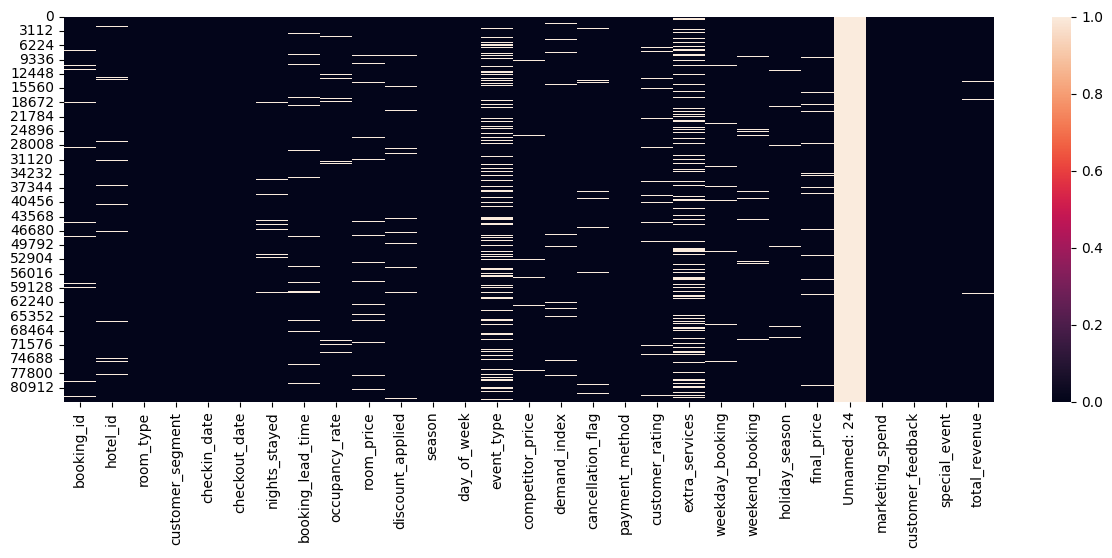

In [11]:
plt.figure(figsize = (15,5))
sns.heatmap(dataset.isnull())
plt.show()

**Intial Observations:**

**Total Entries:** *84,000 rows*

**Columns:** *29 features (mixed data types: float, int, object)*

**Missing Values:** *Some columns have missing values,*

*such as: booking_id, hotel_id, night_stayed, booking_lead_time, occupacy_rate, room_price, etc.*

**Potential Issues:**

**Irrelevant Column:**- *Unnamed-24 (all values are NaN,should be dropped).*

**Data Columns:** *checking_date, checkout_date need to be converted to datetime format.*

**Erroneous Data:** *booking_id and hotel_id contain missing values and should be checked for inconsistencies.*

**Numerical Issues:** *Some columns (weekday_booking, weekend_booking, holiday_season) have fractional values when they should be binary (0 or 1).*

**Categorical Variables:** *Need encoding (room_type,customer_segment, sesason, payment_method, etc.).*


**--Handling Missing Data--**

In [12]:
dataset.drop(columns = ['Unnamed: 24'], inplace = True) #full empty data in this column

In [13]:
dataset.head(3)

,booking_id,hotel_id,room_type,customer_segment,checkin_date,checkout_date,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,season,day_of_week,event_type,competitor_price,demand_index,cancellation_flag,payment_method,customer_rating,extra_services,weekday_booking,weekend_booking,holiday_season,final_price,marketing_spend,customer_feedback,special_event,total_revenue
0,1.0,83.162133,Deluxe,Business,1/1/2023 0:00,1/2/2023 0:00,2.0,77.000000,0.974571,240.000000,0.210000,High,Sunday,NaN,278.000000,0.88,1.0,Online Payment,1.6,All Inclusive,0.0,1.000000,1.000,189.60,598,Negative,0,354.754562
1,2.0,37.000000,Suite,Leisure,1/1/2023 1:00,1/2/2023 1:00,8.0,141.090510,0.940000,371.722847,0.011389,Peak,Tuesday,Sport Event,85.235760,0.91,0.0,Cash,2.1,Spa,1.0,0.000000,0.975,323.73,397,Positive,0,2219.549300
2,NaN,68.000000,Double,Business,1/1/2023 2:00,1/2/2023 2:00,4.0,321.437928,0.430000,75.924776,0.240000,Low,Friday,Holiday,252.210705,0.98,0.0,Cash,3.1,NaN,0.0,0.987964,0.000,53.96,900,Positive,0,215.840000


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84000 entries, 0 to 83999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   booking_id         81470 non-null  float64
 1   hotel_id           81494 non-null  float64
 2   room_type          84000 non-null  object 
 3   customer_segment   84000 non-null  object 
 4   checkin_date       84000 non-null  object 
 5   checkout_date      84000 non-null  object 
 6   nights_stayed      81465 non-null  float64
 7   booking_lead_time  81486 non-null  float64
 8   occupancy_rate     81465 non-null  float64
 9   room_price         81450 non-null  float64
 10  discount_applied   81484 non-null  float64
 11  season             84000 non-null  object 
 12  day_of_week        84000 non-null  object 
 13  event_type         67396 non-null  object 
 14  competitor_price   81479 non-null  float64
 15  demand_index       81478 non-null  float64
 16  cancellation_flag  814

**Filling Null values in all object datatype by using for loop...**

In [15]:
# Checking Null values in Categorical data.
dataset.select_dtypes(include = 'object').isnull().sum()

room_type                0
customer_segment         0
checkin_date             0
checkout_date            0
season                   0
day_of_week              0
event_type           16604
payment_method           0
extra_services       16922
customer_feedback        0
dtype: int64

In [16]:
for i in dataset.select_dtypes(include = 'object').columns:
    dataset[i].fillna(dataset[i].mode()[0],inplace = True)

**Handling null Values in Numerical Data.**

In [17]:
import uuid
dataset['booking_id'].fillna(dataset['booking_id'].apply(lambda x: str(uuid.uuid4()) if pd.isna(x) else x),inplace = True)

In [18]:
import uuid
dataset['hotel_id'].fillna(dataset['hotel_id'].apply(lambda x: str(uuid.uuid4()) if pd.isna(x) else x),inplace = True)

In [19]:
dataset.select_dtypes(include = 'float64').isnull().sum()

nights_stayed        2535
booking_lead_time    2514
occupancy_rate       2535
room_price           2550
discount_applied     2516
competitor_price     2521
demand_index         2522
cancellation_flag    2544
customer_rating      2490
weekday_booking      2518
weekend_booking      2553
holiday_season       2542
final_price          2564
total_revenue        2540
dtype: int64

In [20]:
dataset.select_dtypes(include = 'float64').columns

Index(['nights_stayed', 'booking_lead_time', 'occupancy_rate', 'room_price',
       'discount_applied', 'competitor_price', 'demand_index',
       'cancellation_flag', 'customer_rating', 'weekday_booking',
       'weekend_booking', 'holiday_season', 'final_price', 'total_revenue'],
      dtype='object')

In [21]:
# Filling using by SimpleImputer
from sklearn.impute import SimpleImputer

In [22]:
# Select only numerical (float64) columns
num_cols =dataset.select_dtypes(include = 'float64').columns

In [23]:
# Initialize SimpleImputer (e.g., filling missing values with the mean.)
imputer = SimpleImputer(strategy='mean')

In [24]:
# Now the missing values are filled in the original dataset.
dataset[num_cols] = imputer.fit_transform(dataset[num_cols])

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Now Checking My Data ...**

In [25]:
dataset.isnull().sum()

booking_id           0
hotel_id             0
room_type            0
customer_segment     0
checkin_date         0
checkout_date        0
nights_stayed        0
booking_lead_time    0
occupancy_rate       0
room_price           0
discount_applied     0
season               0
day_of_week          0
event_type           0
competitor_price     0
demand_index         0
cancellation_flag    0
payment_method       0
customer_rating      0
extra_services       0
weekday_booking      0
weekend_booking      0
holiday_season       0
final_price          0
marketing_spend      0
customer_feedback    0
special_event        0
total_revenue        0
dtype: int64

## Visualize by using Heatmap. ##

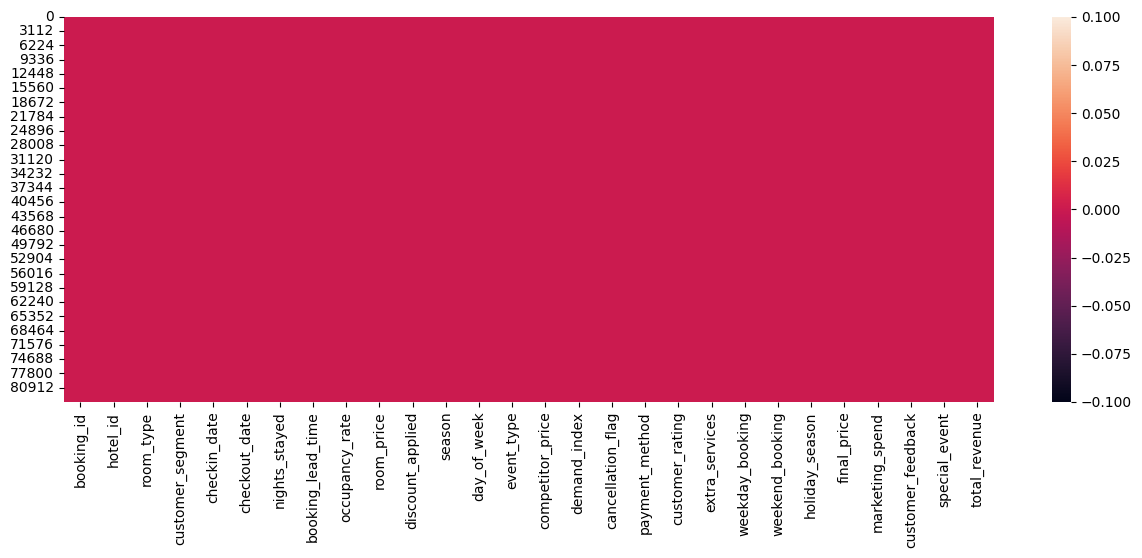

In [26]:
plt.figure(figsize = (15,5))
sns.heatmap(dataset.isnull())
plt.show()

**-- Converting to date formats**

In [27]:
dataset['checkin_date'] = pd.to_datetime(dataset['checkin_date'])
dataset['checkout_date'] = pd.to_datetime(dataset['checkout_date'])

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84000 entries, 0 to 83999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   booking_id         84000 non-null  object        
 1   hotel_id           84000 non-null  object        
 2   room_type          84000 non-null  object        
 3   customer_segment   84000 non-null  object        
 4   checkin_date       84000 non-null  datetime64[ns]
 5   checkout_date      84000 non-null  datetime64[ns]
 6   nights_stayed      84000 non-null  float64       
 7   booking_lead_time  84000 non-null  float64       
 8   occupancy_rate     84000 non-null  float64       
 9   room_price         84000 non-null  float64       
 10  discount_applied   84000 non-null  float64       
 11  season             84000 non-null  object        
 12  day_of_week        84000 non-null  object        
 13  event_type         84000 non-null  object        
 14  compet

## Adding 'Average Daily Rate' column And 'Booking Month' Column on Dataset ##

In [29]:

# Extract the booking month (e.g., January, February)
dataset['booking_month'] = dataset['checkin_date'].dt.strftime('%B')

In [30]:

# Calculate average daily rate
dataset['avg_daily_rate'] = dataset['total_revenue'] / dataset['nights_stayed']

## Shift 'total_revenue' column to the last index column ##

In [31]:
dataset = dataset[[col for col in dataset.columns if col != 'total_revenue'] + ['total_revenue']]

## Handling Duplicated Values Present or Not. ##

In [32]:
dataset.duplicated().sum()

np.int64(13172)

In [33]:
dataset.drop_duplicates(inplace = True)

In [34]:
dataset.shape

(70828, 30)

## Datatype Change And Replacing Data ##

In [35]:
dataset.head()

,booking_id,hotel_id,room_type,customer_segment,checkin_date,checkout_date,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,season,day_of_week,event_type,competitor_price,demand_index,cancellation_flag,payment_method,customer_rating,extra_services,weekday_booking,weekend_booking,holiday_season,final_price,marketing_spend,customer_feedback,special_event,booking_month,avg_daily_rate,total_revenue
0,1.0,83.162133,Deluxe,Business,2023-01-01 00:00:00,2023-01-02 00:00:00,2.0,77.000000,0.974571,240.000000,0.210000,High,Sunday,Sport Event,278.000000,0.88,1.0,Online Payment,1.6,All Inclusive,0.0,1.000000,1.000,189.60,598,Negative,0,January,177.377281,354.754562
1,2.0,37.0,Suite,Leisure,2023-01-01 01:00:00,2023-01-02 01:00:00,8.0,141.090510,0.940000,371.722847,0.011389,Peak,Tuesday,Sport Event,85.235760,0.91,0.0,Cash,2.1,Spa,1.0,0.000000,0.975,323.73,397,Positive,0,January,277.443663,2219.549300
2,4b8229d0-3372-4de7-98e5-d6413282fe74,68.0,Double,Business,2023-01-01 02:00:00,2023-01-02 02:00:00,4.0,321.437928,0.430000,75.924776,0.240000,Low,Friday,Holiday,252.210705,0.98,0.0,Cash,3.1,Spa,0.0,0.987964,0.000,53.96,900,Positive,0,January,53.960000,215.840000
3,4.0,92.0,Deluxe,Group,2023-01-01 03:00:00,2023-01-02 03:00:00,12.0,230.000000,0.893630,47.713353,0.230000,High,Sunday,Sport Event,446.000000,1.34,0.0,Debit Card,3.7,All Inclusive,0.0,1.000000,1.000,41.58,690,Positive,0,January,38.426648,461.119780
4,5.396982,72.0,Double,Group,2023-01-01 04:00:00,2023-01-02 04:00:00,7.0,362.000000,0.800000,348.000000,0.010000,Low,Sunday,Holiday,299.229040,1.05,0.0,Cash,3.9,Spa,0.0,1.069103,0.000,344.52,315,Positive,0,January,314.074813,2198.523692


# date column 

In [36]:
# dataset['checkout_date'] = pd.to_datetime(dataset['checkout_date'])
dataset['checkout_year'] = dataset['checkout_date'].dt.year
dataset['checkout_month'] = dataset['checkout_date'].dt.month
dataset['checkout_day'] = dataset['checkout_date'].dt.day


In [37]:
# NOW drop 'checkout_date' and 'Checking_date' extra columns
dataset.drop(columns=['checkout_date',],inplace=True)


In [38]:
# Checking Unique Values in Hotel_ID..
print(dataset['hotel_id'].unique())

[83.16213337 37.0 68.0 ... 'b4c25974-c2be-4811-ac3c-06fcfb36c846'
 'c0a0b803-07e8-4703-90dd-b9f7e324496f'
 '59abed77-7d2c-4823-9588-4574e29353d8']


In [39]:
# Check Data type and Remove Non-Numeric Values...
dataset = dataset[pd.to_numeric(dataset['hotel_id'],errors = 'coerce').notna()]

In [40]:
# Conmverting Hotel_idnto 'float'..
dataset['hotel_id'] = dataset['hotel_id'].astype('float64')

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [41]:
# Checking Unique Values in booking_ID..
print(dataset['booking_id'].unique())

[1.0 2.0 '4b8229d0-3372-4de7-98e5-d6413282fe74' ...
 'b06ebf22-1b38-4cbe-8580-64e37a79c8ec'
 '10bc1c0f-009c-41ca-a60b-486d79519f97'
 '9ee80810-43b1-44ca-b15b-5e4b4bfd6683']


In [42]:
# Check Data type and Remove Non-Numeric Values...
dataset = dataset[pd.to_numeric(dataset['booking_id'],errors = 'coerce').notna()]

In [43]:
# Conmverting booking_id to 'float'..
dataset['booking_id'] = dataset['booking_id'].astype('float64')

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [44]:
dataset.head()

,booking_id,hotel_id,room_type,customer_segment,checkin_date,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,season,day_of_week,event_type,competitor_price,demand_index,cancellation_flag,payment_method,customer_rating,extra_services,weekday_booking,weekend_booking,holiday_season,final_price,marketing_spend,customer_feedback,special_event,booking_month,avg_daily_rate,total_revenue,checkout_year,checkout_month,checkout_day
0,1.000000,83.162133,Deluxe,Business,2023-01-01 00:00:00,2.0,77.00000,0.974571,240.000000,0.210000,High,Sunday,Sport Event,278.00000,0.88,1.0,Online Payment,1.600000,All Inclusive,0.000000,1.000000,1.000,189.600000,598,Negative,0,January,177.377281,354.754562,2023,1,2
1,2.000000,37.000000,Suite,Leisure,2023-01-01 01:00:00,8.0,141.09051,0.940000,371.722847,0.011389,Peak,Tuesday,Sport Event,85.23576,0.91,0.0,Cash,2.100000,Spa,1.000000,0.000000,0.975,323.730000,397,Positive,0,January,277.443663,2219.549300,2023,1,2
3,4.000000,92.000000,Deluxe,Group,2023-01-01 03:00:00,12.0,230.00000,0.893630,47.713353,0.230000,High,Sunday,Sport Event,446.00000,1.34,0.0,Debit Card,3.700000,All Inclusive,0.000000,1.000000,1.000,41.580000,690,Positive,0,January,38.426648,461.119780,2023,1,2
4,5.396982,72.000000,Double,Group,2023-01-01 04:00:00,7.0,362.00000,0.800000,348.000000,0.010000,Low,Sunday,Holiday,299.22904,1.05,0.0,Cash,3.900000,Spa,0.000000,1.069103,0.000,344.520000,315,Positive,0,January,314.074813,2198.523692,2023,1,2
5,6.000000,24.000000,Single,Group,2023-01-01 05:00:00,6.0,124.00000,0.640000,374.782901,0.230000,Low,Tuesday,Holiday,128.00000,0.82,0.0,Online Payment,1.330687,All Inclusive,0.853303,0.428374,0.000,266.442993,854,Neutral,0,January,257.950000,1547.700000,2023,1,2


## datatype changing of necessary columns in right Format.. ##

In [45]:
dataset["hotel_id"] = dataset["hotel_id"].round(0).astype(int)

In [46]:
print(dataset["hotel_id"].unique())  # Check unique values
print(dataset["hotel_id"].dtype)     # Check data type

[ 83  37  92  72  24  25  27  73  64  63  54  23  46   1  45 101  88  20
  49  34  42  96  10   7   5  52  91  51  82   6  53  80  99  36  87  44
  50  47  98  43   9  29  14  66  71  35  55  86   8  59  84  77   2  60
  70  95  62  89  31  38  75  17  11  61  39 103  90  12  57  68  78  67
  22  94  65   3  58  15  41  56  30  21  40  33  93  26  97  76  69   4
 100  48  19  16  79  32  13  18  28  81  85  74 113 108 102 107 106 104
 105 110 109 112 114 111 115]
int64


In [47]:
dataset["booking_id"] = dataset["booking_id"].round(0).astype(int)

In [48]:
print(dataset["booking_id"].unique())  # Check unique values
print(dataset["booking_id"].dtype)     # Check data type


[    1     2     4 ... 69998 69999 70000]
int64


In [49]:
dataset["nights_stayed"] = dataset["nights_stayed"].round(0).astype(int)

In [50]:
print(dataset["nights_stayed"].unique())  # Check unique values
print(dataset["nights_stayed"].dtype)     # Check data type

[ 2  8 12  7  6 14  3 13  5 11  9  1 15 10  4 16]
int64


In [51]:
dataset["booking_lead_time"] = dataset["booking_lead_time"].round(0).astype(int)

In [52]:
print(dataset["booking_lead_time"].unique())  # Check unique values
print(dataset["booking_lead_time"].dtype)     # Check data type

[ 77 141 230 362 124  15 226 285  66  23 138 293 327 288 282 236 182  50
 244 234  41  99 387 262  33 291 228 150 290 153  30  48  60  51 346  81
 358  62 167 338 289 334 240 100  21 265 127 102 212 261 121 294   4  80
 253 360  61 385  88 187 268  49 269 117  97 209 171 101 223 164 345 314
 348 349  20  52 287  63 300 211 197 152 142 157 340  74 217 330  12 139
 276 200 222 112 149  16 281 363 213 221 322  72  35 245 361 189 264  42
  70 256 316  11 299 352   5 275  46 163 271  43 318 305 147 317 378 326
 283 201 255  76 113 239 111 257  93 129  38 170 308  40 165 254  71  58
  54 159 155   6 180 286  56 134 108 146 172 154 204 133 194 247 351 191
 148  24  82 324  22  84 258 115  45  87  98 400  85 284  91 216 347 151
 302 328 311 186 370 122 320   0  59 214 319 279 315 104   3 185 136  57
 339 218  89 116  73 355  67 343 357 162  53  31 196   9  86  68 331   7
 278 272 356  55 143 296 188 274 303 235 176 206 225 359 103   1 123  25
 297 177 344 184 175 350 227 131  28  19 295 105 16

In [53]:
dataset["cancellation_flag"] = dataset["cancellation_flag"].round(0).astype(int)

In [54]:
print(dataset["cancellation_flag"].unique())  # Check unique values
print(dataset["cancellation_flag"].dtype)     # Check data type

[1 0]
int64


In [55]:
dataset["weekday_booking"] = dataset["weekday_booking"].round(0).astype(int)

In [56]:
print(dataset["weekday_booking"].unique())  # Check unique values
print(dataset["weekday_booking"].dtype)     # Check data type

[0 1]
int64


In [57]:
dataset["weekend_booking"] = dataset["weekend_booking"].round(0).astype(int)

In [58]:
print(dataset["weekend_booking"].unique())  # Check unique values
print(dataset["weekend_booking"].dtype)     # Check data type

[1 0]
int64


In [59]:
dataset["holiday_season"] = dataset["holiday_season"].round(0).astype(int)

In [60]:
print(dataset["holiday_season"].unique())  # Check unique values
print(dataset["holiday_season"].dtype)     # Check data type

[1 0]
int64


In [61]:
dataset.tail()

,booking_id,hotel_id,room_type,customer_segment,checkin_date,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,season,day_of_week,event_type,competitor_price,demand_index,cancellation_flag,payment_method,customer_rating,extra_services,weekday_booking,weekend_booking,holiday_season,final_price,marketing_spend,customer_feedback,special_event,booking_month,avg_daily_rate,total_revenue,checkout_year,checkout_month,checkout_day
69995,75349,59,Double,Business,2030-12-26 11:00:00,13,30,0.712608,263.0,0.230000,Mid,Thursday,Sport Event,230.000000,0.997351,0,Debit Card,2.416866,Spa,1,0,0,202.51,694,Negative,1,December,202.51000,2632.63,2030,12,27
69996,69997,33,Suite,Solo,2030-12-26 12:00:00,14,35,0.960000,223.0,0.150000,Mid,Sunday,Conference,293.000000,1.380000,0,Online Payment,4.900000,Spa,0,1,0,189.55,574,Negative,0,December,189.55000,2653.70,2030,12,27
69997,69998,75,Double,Group,2030-12-26 13:00:00,7,271,0.641374,242.0,0.100000,High,Monday,Conference,478.000000,0.910000,0,Credit Card,4.506475,Breakfast,1,0,1,217.80,110,Negative,0,December,377.55264,2831.40,2030,12,27
69998,69999,13,Suite,Business,2030-12-26 14:00:00,1,22,0.490603,190.0,0.079688,Mid,Sunday,Sport Event,443.000000,1.310662,0,Online Payment,1.100000,Breakfast,0,0,0,176.70,688,Negative,0,December,154.42368,176.70,2030,12,27
69999,70000,77,Suite,Group,2030-12-26 15:00:00,7,233,0.699523,206.0,0.180666,Mid,Sunday,Sport Event,142.930233,1.565231,0,Debit Card,3.500000,Parking,0,1,0,168.92,809,Negative,0,December,168.92000,1182.44,2030,12,27


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65858 entries, 0 to 69999
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   booking_id         65858 non-null  int64         
 1   hotel_id           65858 non-null  int64         
 2   room_type          65858 non-null  object        
 3   customer_segment   65858 non-null  object        
 4   checkin_date       65858 non-null  datetime64[ns]
 5   nights_stayed      65858 non-null  int64         
 6   booking_lead_time  65858 non-null  int64         
 7   occupancy_rate     65858 non-null  float64       
 8   room_price         65858 non-null  float64       
 9   discount_applied   65858 non-null  float64       
 10  season             65858 non-null  object        
 11  day_of_week        65858 non-null  object        
 12  event_type         65858 non-null  object        
 13  competitor_price   65858 non-null  float64       
 14  demand_inde

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [63]:
dataset.to_csv("cleaned_hoteldata_befor_encoding.csv", index=False)


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# - Visualizing Data Trends -

## ※ Question-1: What si the trend of hotel revenue over time ?

*This line chart visualizes how the total revenue has change over time, allowing you to observe seasonal patterns, trends and any anomalies. 
*By grouping data by month or week, you can spot fluctuations in revenue, potentially due to factors like holidays or special events.*

**key Insights:**

**Seasonality:** *You can identity if revenue spikes during certain times of the year(e.g. holiday, summer months.)*

**Growth/Decline:** *Helps to analyze if your revenue is growing staying constant or declining over time.*

**Outlieer:** *Any unusual peaks or drops in revenue can be spatted for futher investigation.*

In [64]:
# dataset['checkin_data'] = pd.to_datetime(dataset['checkin_date'],errors='coerce')
# dataset['checkout_data'] = pd.to_datetime(dataset['checkout_date'],errors='coerce')


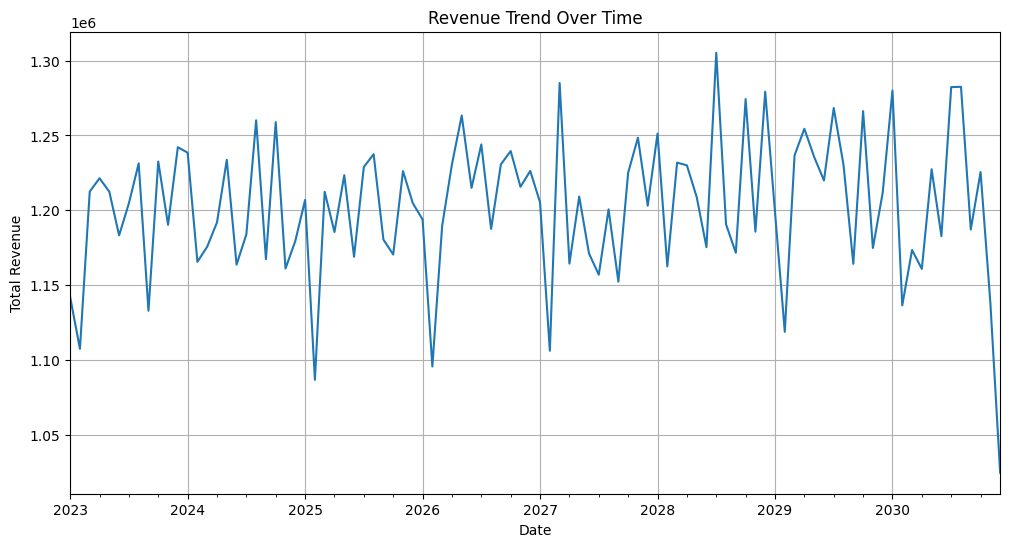

In [65]:
dataset.set_index('checkin_date',inplace = True)

# Plotting the total revenue over time
plt.figure(figsize = (12,6))
dataset['total_revenue'].resample('M').sum().plot()
plt.title('Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

**Trend of Hotel Revenue Over Time**

*• The given line chart displays the Revenue Trend Over Time*

*• where the x-axis represents the Date (years), and the y-axis represents Total Revenue.*

*• The data has been resampled on a monthly basis (M), summing up the revenue for each month.*

**Observations:**

*• The revenue fluctuates over time, showing periodic increases and decreases.*

*• The revenue fluctuates over time, showing periodic increases and decreases.*

*• There are several peaks and drops, indicating seasonal variations or demand changes in the hotel industry.*

*• While the revenue mostly remains within a stable range, there are some sharp declines, which could be due to external  factors such as off-seasons, economic downturns, or market conditions.*

*• The overall pattern suggests that revenue is highly, with both high-revenue and low-revenue months recurring over time.*

**Conclusion:**

*he hotel’s revenue does not follow a simple increasing or decreasing trend . This suggests that revenue might be influenced by factors such as seasonality, holidays, economic conditions, and customer demand fluctuations. Further analysis, such as trend decomposition or forecasting models, could help in identifying the underlying causes of these variations.*





## ※ Question-2: How does competitor pricing affect hotel pricing? ##

*This line chart compares room price with competitor prices over time, It helps analyze to strategy relative to competitor.*

**key Insights:**

**Competitive_Pricing:** *Shows if hotel priced higher or lower than competitors at any given point.*

**Market_Positioning:** *Helps to decide if you are in a competitive pricing range or if price adjustments are neccesary.*

**Trend/Analysis:** *Identifies any pricing gaps or patterns that suggest you should align more closely with competitors.*




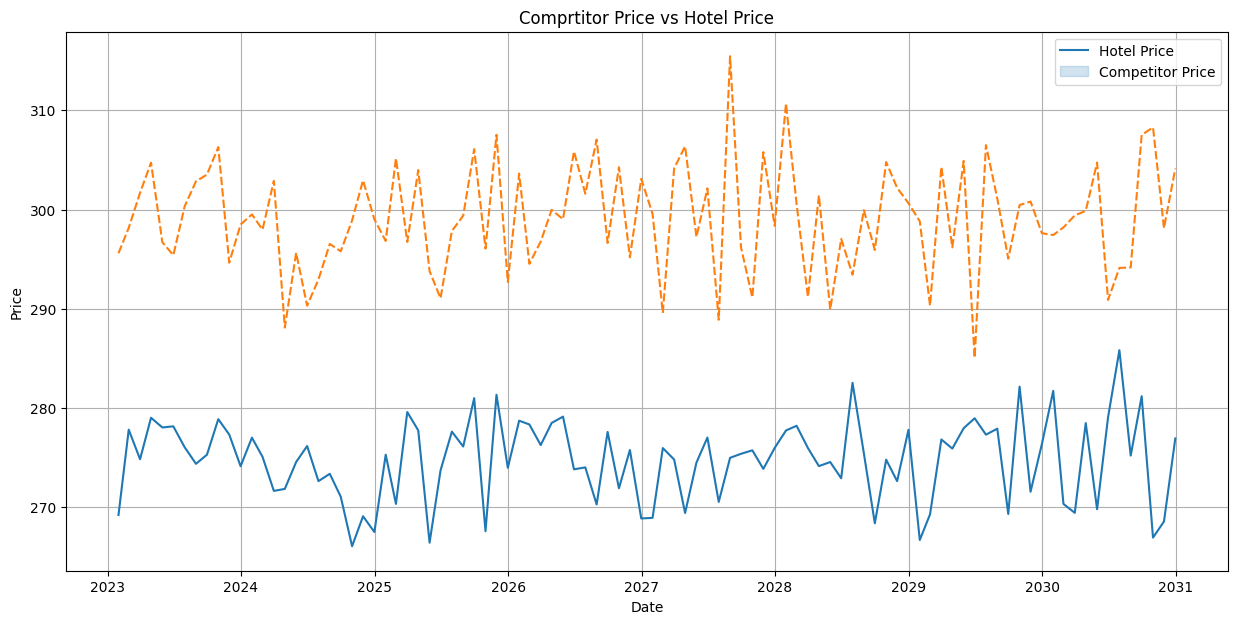

In [66]:
plt.figure(figsize=(15,7))
sns.lineplot(data = dataset[['room_price','competitor_price']].resample('M').mean())
plt.title('Comprtitor Price vs Hotel Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Hotel Price','Competitor Price'])
plt.grid(True)
plt.show()

** Summary of the Diagram (Competitor Price vs. Hotel Price Trend), This line graph shows how the monthly average prices of a hotel's room rates (blue line) and its rival's prices (orange line) have varied for a number of years (2023-2031).**

**Parallel Trends:**

*• The prices both follow parallel movements, revealing that the hotel is matching price changes to counter competitors.*

*•  As the prices of the competitors rise/fall, the hotel's prices also rise/fall, reflecting dynamic pricing strategies.*

**Price Sensitivity:**

*• The hotel price is a bit less or the same as the competitor, probably in order to be competitive without losing business.*

*• A sharp decline in the prices of competitors after 2026 results in an equivalent decrease in hotel prices, indicating real-time market reaction.*

**Demand Peaks:**

*• Both prices reach their peak in 2025–2026, perhaps because of peak demand (e.g., tourist season, events).*

*• Prices stabilize afterwards, pointing towards market equilibrium.*

**• Competitor-based pricing:**

 *–  The hotel regularly tracks and replicates competitor prices in order to attain optimum occupancy and revenue.*

**• Market responsiveness:**

*– Data-driven price decisions balance profitability and competitiveness.*

**Business Implication:**

*Strategy:*
*• The hotel probably employs revenue management software to monitor competitors and set prices dynamically.*

*Risk:*
*• Excessive dependence on competitor prices might restrict profit margins if not blended with demand forecasting.*

**"The hotel's rates follow closely with the competition, reflecting a reactive yet strategic stance in ensuring market competitiveness."**






## ※ Question-3 How does total revenue vary across different customer segments in the hotel industry? ##

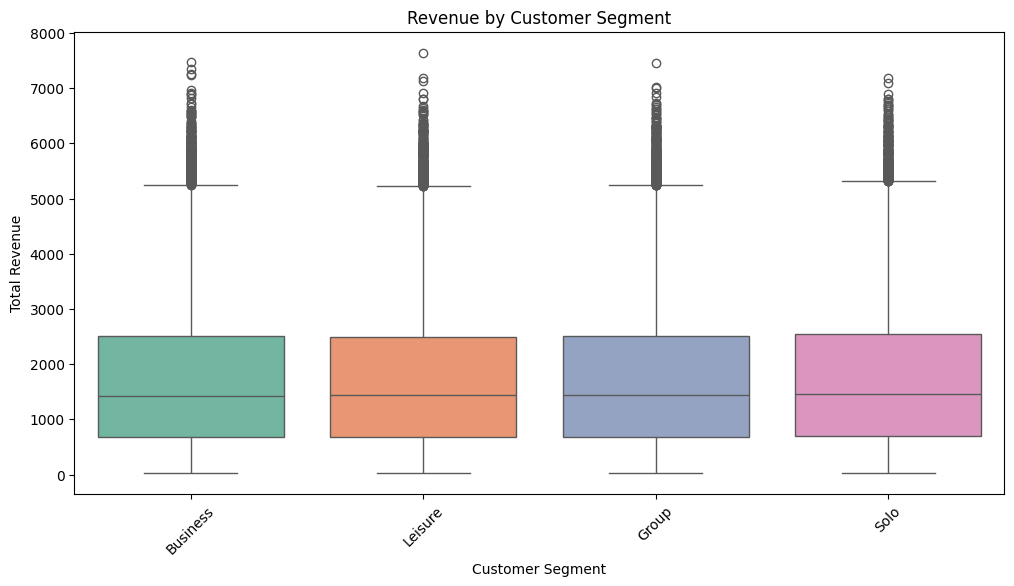

In [67]:
plt.figure(figsize =(12,6))
sns.boxplot(x = 'customer_segment',y = 'total_revenue', data = dataset,palette='Set2')
plt.title('Revenue by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)
plt.show()

**Chart Boxplot:**

*• The boxplot visualizes Total Revenue distribution across different Customer Segments (Business, Leisure, Group, and Solo).*

*• The median revenue is relatively similar for all segments, indicating no extreme differences in central tendency.*

*• However, there are numerous outliers (high-revenue bookings) present in all segments, especially in the upper range.*

*•  This suggests that certain customers contribute significantly higher revenue than the majority.*

*• The revenue distribution is right-skewed, meaning that while most transactions are within a moderate range, some bookings generate significantly higher revenue.*

## ※ Questioin-4 What is the relationship between Room Price and Occupancy Rate? ##

*This scatter plot compares the room price with the occupancy rate. It shows whether there's a relationship between the price of rooms and how often they are booked.*

**Key Insight:**

*Pricing Strategy:* *Helps determine if higher room prices lead to lower occupancy or vise versa. If a high price corresponds to low occupancy. you might want to adjust your pricing.

*Demand Sensitivity:* *If the scatter shows a clear negative correlation, It suggest that reducing prices could increase booking.*

*Outliers:* *Outliers might indicate special circumstances, like very high-priced rooms that are often unbooked.*

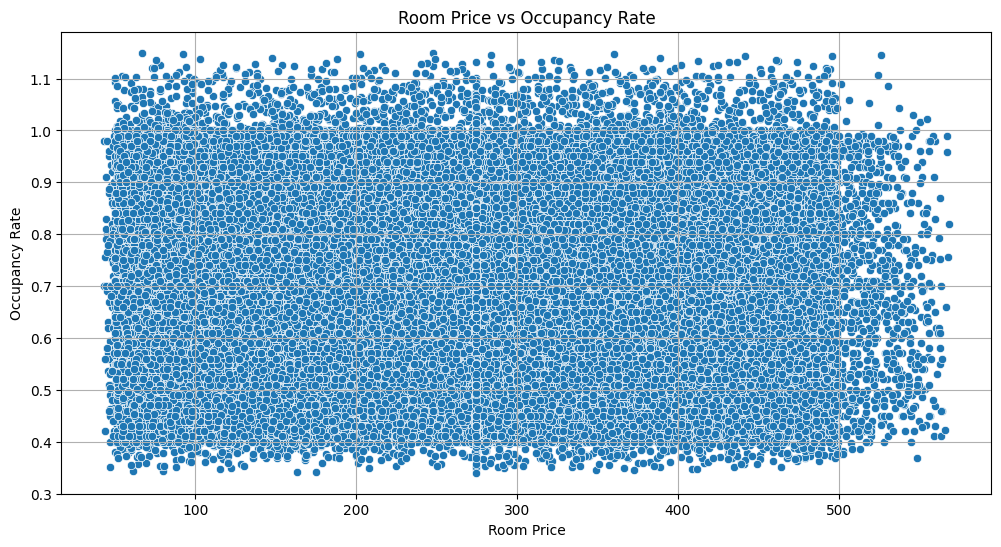

In [68]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='room_price',y='occupancy_rate',data=dataset)
plt.title('Room Price vs Occupancy Rate')
plt.xlabel('Room Price')
plt.ylabel('Occupancy Rate')
plt.grid(True)
plt.show()

**Chart: Scatter Plot**

*X-axis: Room Price ($)*

*Y-axis: Occupancy Rate (%):*

*• This scatter plot shows how room price affects occupancy rate.*

*• Typically, when room prices increase, occupancy rates decrease because customers may look for    cheaper alternatives.*

*• However, certain price points may maintain stable demand, which can help hotel managers set optimal pricing strategies.*

## ※ Question-5 What is the Average Daily Rate by Booking Month? ##   

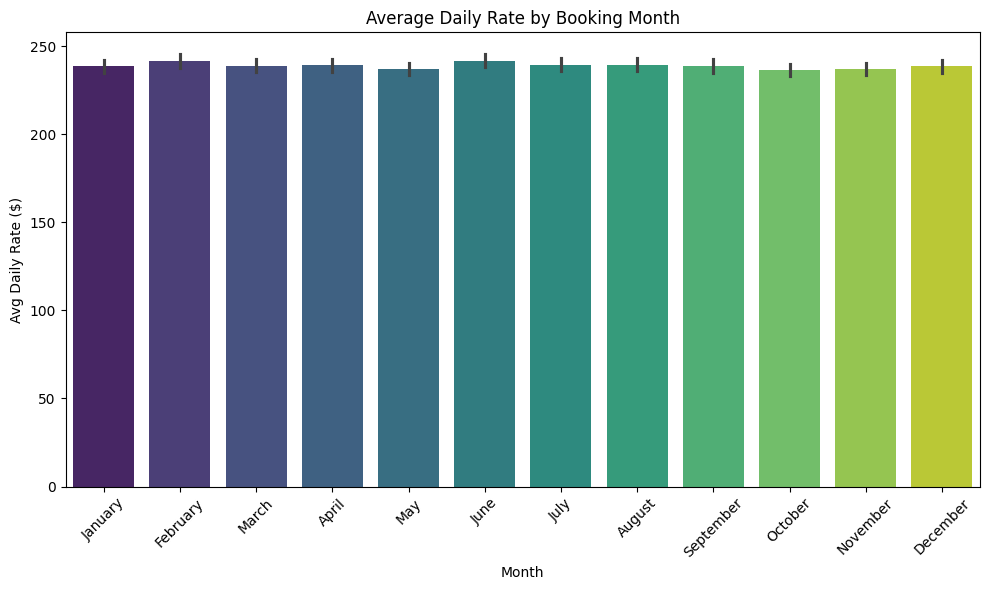

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure booking_month is in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Group and plot
plt.figure(figsize=(10,6))
sns.barplot(data=dataset, x='booking_month', y='avg_daily_rate', order=month_order, palette='viridis')
plt.title('Average Daily Rate by Booking Month')
plt.ylabel('Avg Daily Rate ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Average Daily Rate by Month", dpi=300, bbox_inches='tight')
plt.show()


 **Average Daily Rate by Booking Month**

*This bar chart visualizes the average daily hotel rate across different booking months. It is based on a dataset where each booking is associated with a particular month and daily rate.*

**Key observations:**

    *The average daily rate (ADR) is relatively consistent across all months, with only slight variations.*

    *June shows the highest ADR, suggesting peak demand or premium pricing during early summer.*

    *May and October have slightly lower ADRs, possibly indicating less demand or more competitive pricing during these months.*

    *The consistent height of bars overall implies that seasonal fluctuation in pricing is not very pronounced, though there are minor peaks and troughs.*

## ※ Questioin-6 What is the Revenue Distribution Across Booking Months? ##

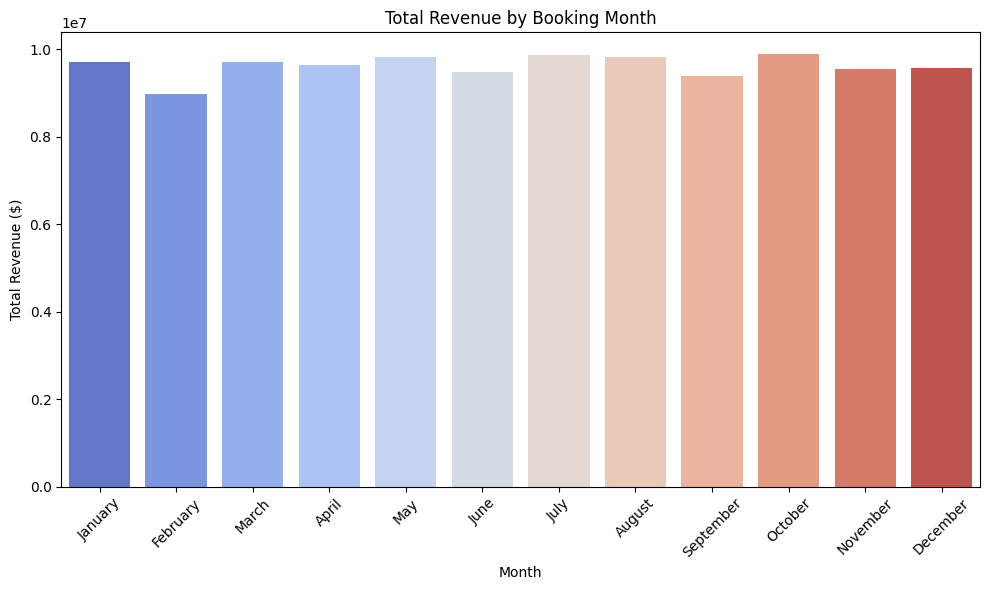

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(data=dataset, x='booking_month', y='total_revenue', order=month_order, estimator=sum, ci=None, palette='coolwarm')
plt.title('Total Revenue by Booking Month')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Total Revenue by Booking Month", dpi=300, bbox_inches='tight')
plt.show()


 **Total Revenue by Booking Month**

*This bar chart displays the total revenue generated per booking month, calculated by summing up the revenue for all bookings within each month.*

**Key observations:**

    *October records the highest total revenue, indicating either a large volume of bookings or a combination of decent volume and high rates.*

    *February has the lowest revenue, which could suggest fewer bookings or lower average rates during this month.*

    *Overall, revenue distribution is fairly balanced across the year, with only moderate fluctuations.*

    *Months like January, July, and August also show strong revenue performance, hinting at peak seasons or effective pricing strategies during these periods.*

## ※ Questioin-7: Which Room Type Generates The Highest Total Revenue in The Hotel? ##

*This bar chart shows the total revenue generated by each room type. It compares the revenue contribution from different room categories.*

**Key Insight:**

*Room Type Popularity: Identifies which room types are the most profitable.*

*Resource Allocation: Helps to decide whether to invest in enhancing specific room types.*

*Pricing Strategy: If one room type is generating much more revenue. It might suggest that guest are willing to pay more for that type.*

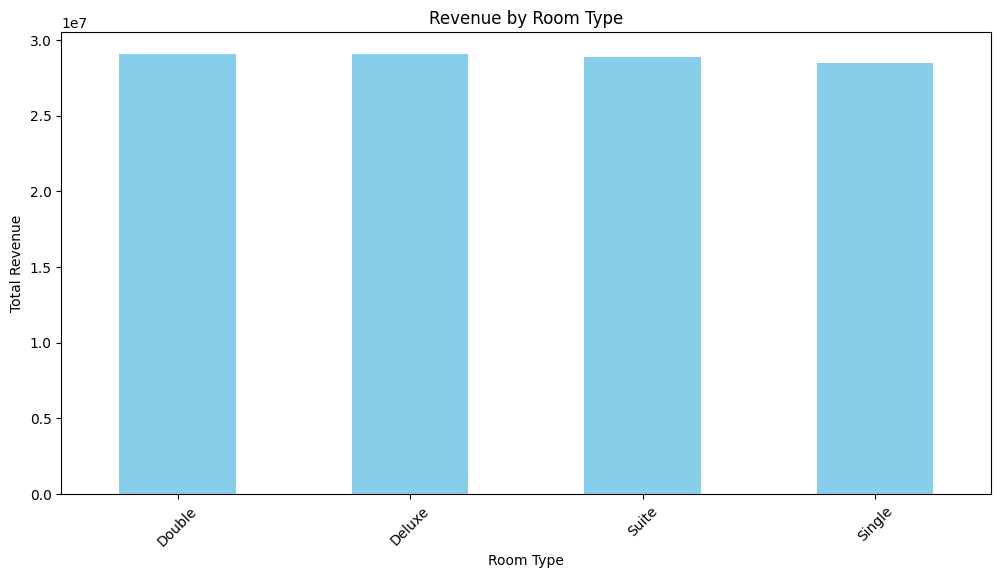

In [71]:
# grouping rooms revenues...
room_revenue = dataset.groupby('room_type')['total_revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
room_revenue.plot(kind='bar',color='skyblue')
plt.title('Revenue by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)
plt.show()

**Barchart:**

*• The bar chart displays Total Revenue generated by different Room Types (Double, Deluxe, Suite, Single).*

*• The revenue appears to be almost equal across all room types, with slight variations.*

*•  This suggests that all room types contribute significantly to the hotel's overall revenue, with no single category dominating.*

*• The revenue distribution indicates a balanced demand for all room types, possibly due to effective pricing strategies and     customer preferences being well-distributed among different accommodation options.*

## ※ Question-8: What is the distribution of booking lead times for hotel reservations? ##

*-- BOOKING LEAD TIME DISTRIBUTION (HISTOGRAM)*

**KEy INsight:**

*Booking Behavior: Helps understand if most customers book for in advance or the last minute.*

*Planning for Demand: If many booking are made early, you may want to adjust or marketing straties for early reservations.*

*Capacity Management: Knowing booking lead time helps in planning room availability.*


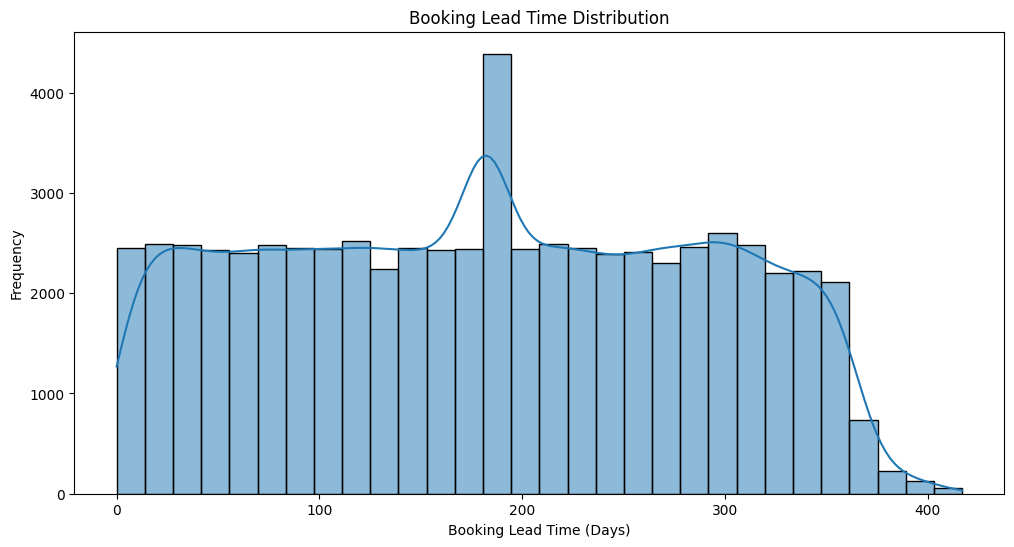

In [72]:
plt.figure(figsize = (12,6))
sns.histplot(dataset['booking_lead_time'], kde=True, bins=30)
plt.title('Booking Lead Time Distribution')
plt.xlabel('Booking Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

**The histogram shows the Booking Lead Time Distribution, or how many days in advance guests book their hotel stay. The lead time in days is shown on the x-axis and the number of bookings on the y-axis.**

**Observations:**

*• There is a wide distribution of booking lead times, ranging from 0 to over 400 days.*

*• The distribution is fairly flat with a high spike at approximately 200 days, showing that a high number of bookings occur at this lead time.*

*• That there is a KDE (Kernel Density Estimation) curve indicates that there are differences in booking behavior, with multiple peaks showing different booking behaviors.*

*• There are some guests that book at very short notice and others that book far in advance.*

*• This disclosure is crucial for dynamic pricing models and demand forecasting to optimize revenue based on booking patterns.*


## ※ Question-9: What Factors Contribute to Cancellation rates across different customer segments? ##

**-- Cancellation Rate by Customer Segment (Bar Chart)**

In [73]:
# grouping calcelled customer by cancellation flag...
cancellation_rate = dataset.groupby('customer_segment')['cancellation_flag'].mean()

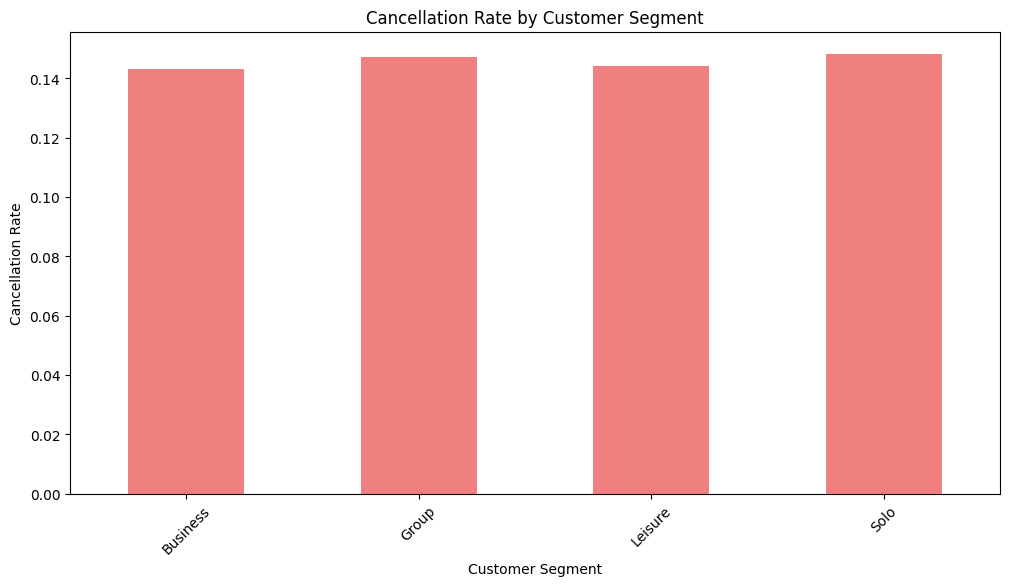

In [74]:
plt.figure(figsize=(12,6))
cancellation_rate.plot(kind='bar',color='lightcoral')
plt.title('Cancellation Rate by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation = 45)
plt.show()

In [75]:
# total_cancellation = dataset.groupby(['checkout_month','cancellation_flag']).size().sum()
# print('Total Cancellation :', total_cancellation)

**This visualization shows the cancellation rates across different customer segments in a dataset:**

**Data Processing:**

*• The code groups the data by 'customer_segment' and calculates the mean of 'cancellation_flag' (which likely indicates whether a customer canceled or not) to determine cancellation rates.*

**• Visualization: A bar chart displays these rates with:**

*• Customer segments on the x-axis*

*• Cancellation rates (0-16%) on the y-axis*

**Key Insight:**

*• The cancellation rates vary significantly between segments, with the highest rate around 16% and the lowest near 0%.*

*• The "Business Group" segment appears to have one of the higher cancellation rates.*

**This analysis helps identify which customer segments are more likely to cancel, enabling targeted retention strategies.**

## ※ Question-10: How do special events impact total revenue, and is the investment in them justified? ##

**-- Impact of Special Events on Revenue (Grouped Bar Chart)**

*This grouped bar chart compares revenue genrated during special events versus regular periods. It helps assess the impact of special events like conferences, holidays, etc, on hotel revenue.*

**Key Insight:**

*Events Impact: If revenue increase significantly during special events, it indicates that these drive bookings.*

*Strategic Planning: Helps you decide whether to increase prices or invest in marketing during event periods.*

*Operational Changes: Identifies peak times when additional resources may be needed (e.g. more staff, room upgrades).*



In [76]:
# grouping revenue of special events...
special_event_revenue = dataset.groupby('special_event')['total_revenue'].sum()

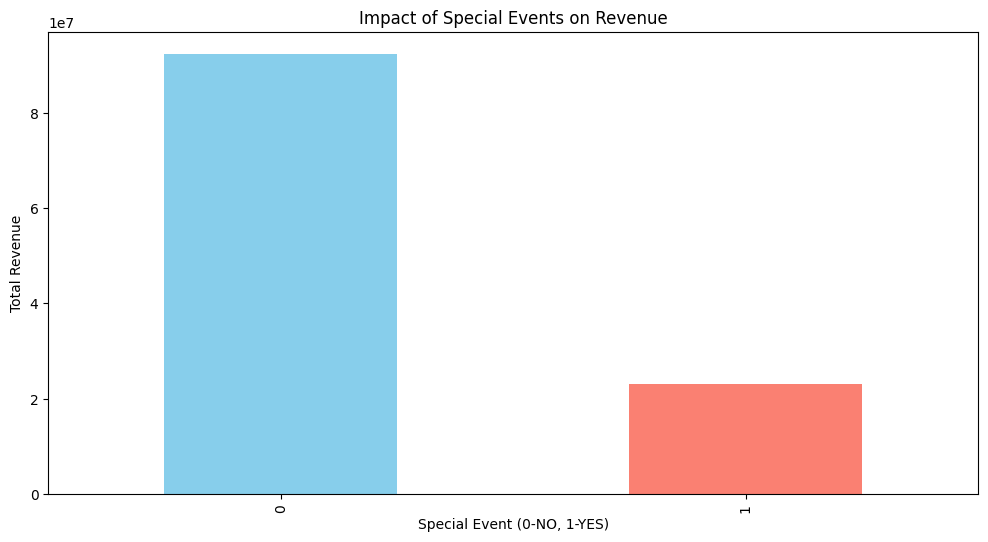

In [77]:
plt.figure(figsize=(12,6))
special_event_revenue.plot(kind='bar',color=['skyblue','salmon'])
plt.title('Impact of Special Events on Revenue')
plt.xlabel('Special Event (0-NO, 1-YES)')
plt.ylabel('Total Revenue')
plt.show()

**This visualization compares the total revenue generated during special events (1 = Yes) versus non-special event periods (0 = No).**

**Revenue Comparison:**

*• The bar chart shows that revenue is significantly higher when special events are held (1 = Yes) compared to regular periods (0 = No).*

*• The exact values aren't visible, but the difference appears substantial.*

**Business Implication:**

*• Special events drive higher revenue, suggesting they are effective in boosting sales.*

*• If the cost of running events is lower than the additional revenue gained, they may be a worthwhile investment.*

**Possible Next Steps:**

*• Analyze which types of events perform best (if data is available).*

*•  Compare profit margins (revenue minus event costs) to determine true ROI.

*• Test more frequent or larger-scale events to maximize revenue impact.*

## ※ Question-11: Does increased marketing spend lead to higher revenue, and what is the optimal spending level? ##

**-- Marketting Spends vs Revenue (Scatter PLot)**
*This scatter plot compares marketing spend with total revenue, It helps to see if higher marketing spend results in increased revenue.*

**key Insight:**

*ROI on MArketing: Helps evaluate the effectiveness of your marketing campaigns, If higher marketing spend leads to mre revenue, It's a sign of a good return an investment.*

*Optimization: If there's little correlation, it suggest that you may need to refine your marketing strategies or allocate the budget differently.*

*Trend Over Time: If plotted over time, you can also see how marketing spend influences long-term revenue growth.*

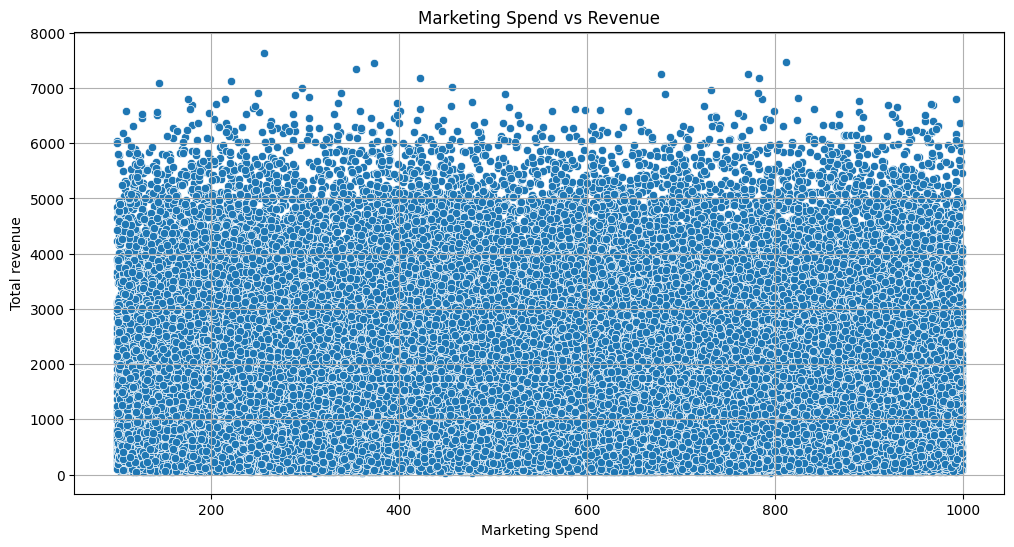

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot (x='marketing_spend', y='total_revenue', data=dataset)
plt.title('Marketing Spend vs Revenue')
plt.xlabel('Marketing Spend')
plt.ylabel('Total revenue')
plt.grid(True)
plt.show()

**(Scatter Plot Analysis):**

**This scatter plot examines the relationship between marketing spend (X-axis) and total revenue (Y-axis).**

*• The plot shows a general upward trend, meaning higher marketing spend tends to result in higher revenue.*

*• the relationship is not perfectly linear—some higher spends don’t always guarantee proportionally higher revenue.*

**Diminishing Returns?**

*• At lower marketing spends (e.g., 200 – 200–600), revenue increases sharply.*

*• At higher spends (e.g., 800 – 800–1000), the revenue growth may plateau, suggesting potential inefficiency.*

**Outliers & Variability:**

*• Some points deviate from the trend, indicating that factors beyond marketing spend (e.g., product quality, seasonality) also influence revenue.*



## ※ Question-12: Heatmap: Correlation of Revenue Factors? ## ## 

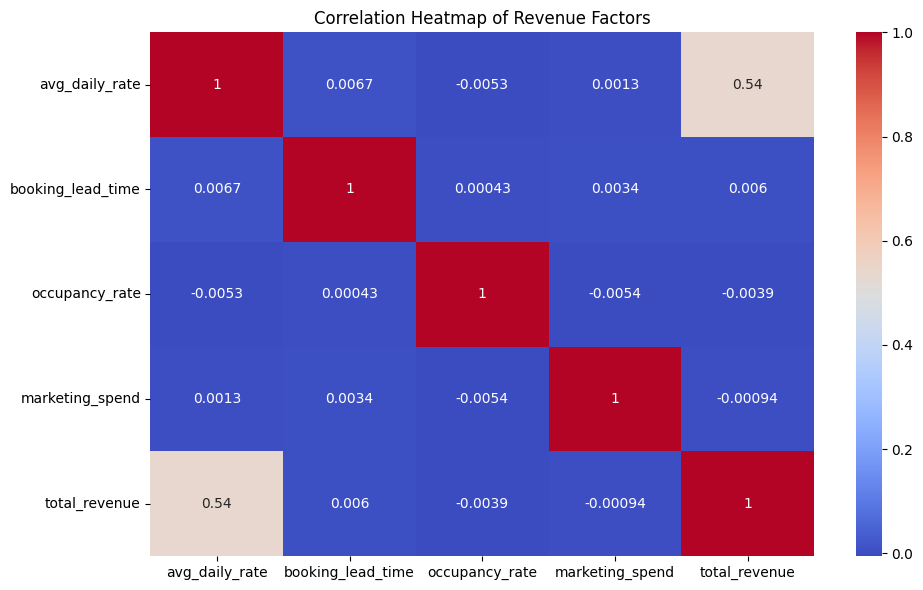

In [79]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset[['avg_daily_rate', 'booking_lead_time', 'occupancy_rate', 'marketing_spend', 'total_revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Revenue Factors')
plt.tight_layout()
plt.savefig("Correaltion Heatmap of Revenue factors", dpi=300, bbox_inches='tight')
plt.show()


**Key insights:**

    avg_daily_rate has the strongest positive correlation with total_revenue (0.54)

    → This suggests that higher daily rates are closely linked to increased revenue.

    Other variables like booking_lead_time, occupancy_rate, and marketing_spend show very weak or no correlation with total_revenue (close to 0).
                                                                                                                                     
    → This implies that these factors alone may not significantly impact revenue in this dataset.

    All other pairwise correlations among the independent factors are also very low, indicating low multicollinearity.

**Conclusion:**
        
Price (avg_daily_rate) is the most influential factor driving revenue in this dataset. Other factors may contribute indirectly or need to be analyzed in combination or with more granular data for deeper insights.


## ※ Question-13: Which room type has the highest median daily rate? ## 

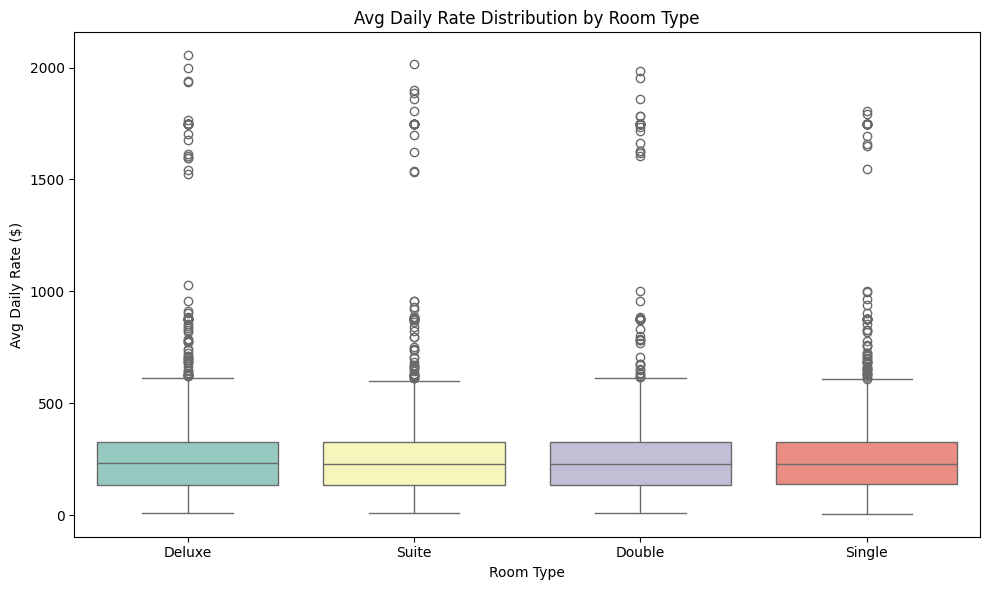

In [80]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset, x='room_type', y='avg_daily_rate', palette='Set3')
plt.title('Avg Daily Rate Distribution by Room Type')
plt.ylabel('Avg Daily Rate ($)')
plt.xlabel('Room Type')
plt.tight_layout()
plt.savefig("Avg Daily Rate of Room Type", dpi=300, bbox_inches='tight')
plt.show()


**(Boxplox of Avg daily rate distribution by room type)**

*This box plot illustrates the distribution of average daily rates (ADR) across different room types in the hotel:*

**Key Observations:**

**Room Types:**
*The plot compares Deluxe, Suite, Double, and Single rooms.*

**Price Range:**

All room types show a wide range of daily rates, with values reaching over $2000 in some cases.

The interquartile range (IQR) (box portion) is relatively similar across room types, suggesting comparable mid-range pricing.

**Outliers:** *Each room type has a noticeable number of outliers, indicating occasional bookings at very high prices — likely during peak seasons or due to premium services.*

**Median Rates:** 

*Median ADR is slightly higher for Deluxe and Suite compared to Double and Single rooms.*

*This aligns with expected pricing hierarchy (Deluxe/Suite > Double > Single).*

*--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

## ※ Question-14: Showing Distribution of Total Revenue.... ##

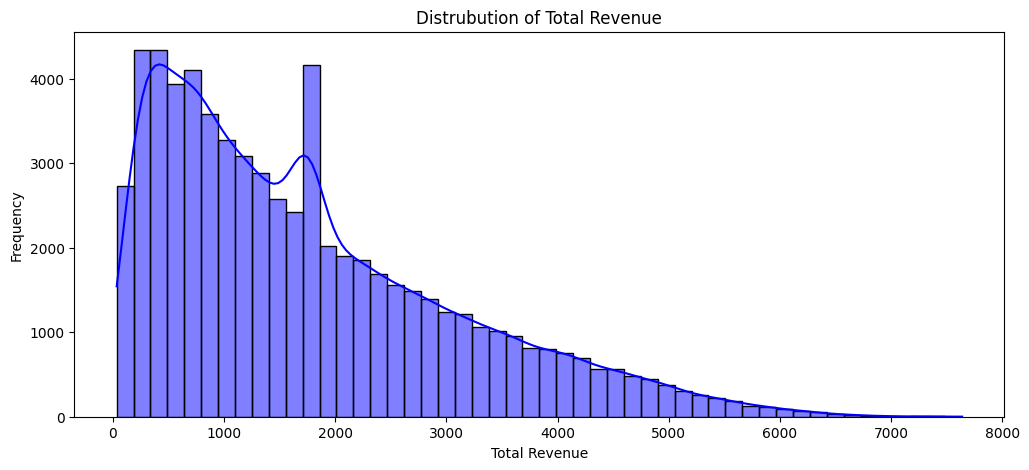

In [81]:
plt.figure(figsize=(12, 5))
sns.histplot(dataset['total_revenue'], bins=50, kde=True, color='blue')
plt.title('Distrubution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

**Distribution Of Total Revenue:**

*• The given histogram illustrates the distribution of total revenue, showcasing how frequently  different revenue values occur in the dataset. The data exhibits a right-skewed distribution, meaning  that most revenue values are concentrated in the lower range, while fewer instances have  significantly higher revenue.*

*• The Kernel Density Estimate (KDE) curve (blue line) highlights the underlying probability distribution,  revealing multiple peaks. This suggests the presence of distinct revenue patterns, possibly due to  variations in customer segments, seasonal demand, or pricing strategies.*

*• The presence of a long tail extending toward higher revenue values indicates that while most  revenue values are low to moderate, some outliers or high-revenue cases exist. This insight can be valuable for revenue optimization, identifying high-value customers, and making data-driven pricing decisions.*


*--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

## OUTLIER CHECKING ##

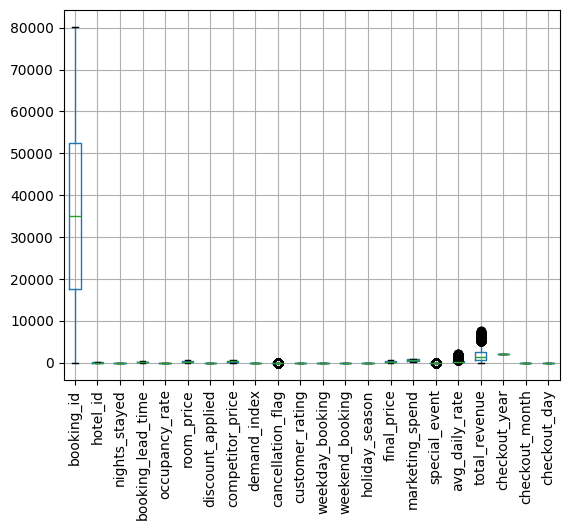

<Figure size 1500x500 with 0 Axes>

In [82]:
dataset.boxplot()
plt.xticks(rotation=90)
plt.figure(figsize=(15,5))
plt.show()

In [83]:
dataset.head()

,booking_id,hotel_id,room_type,customer_segment,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,season,day_of_week,event_type,competitor_price,demand_index,cancellation_flag,payment_method,customer_rating,extra_services,weekday_booking,weekend_booking,holiday_season,final_price,marketing_spend,customer_feedback,special_event,booking_month,avg_daily_rate,total_revenue,checkout_year,checkout_month,checkout_day
checkin_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,83,Deluxe,Business,2,77,0.974571,240.000000,0.210000,High,Sunday,Sport Event,278.00000,0.88,1,Online Payment,1.600000,All Inclusive,0,1,1,189.600000,598,Negative,0,January,177.377281,354.754562,2023,1,2
2023-01-01 01:00:00,2,37,Suite,Leisure,8,141,0.940000,371.722847,0.011389,Peak,Tuesday,Sport Event,85.23576,0.91,0,Cash,2.100000,Spa,1,0,1,323.730000,397,Positive,0,January,277.443663,2219.549300,2023,1,2
2023-01-01 03:00:00,4,92,Deluxe,Group,12,230,0.893630,47.713353,0.230000,High,Sunday,Sport Event,446.00000,1.34,0,Debit Card,3.700000,All Inclusive,0,1,1,41.580000,690,Positive,0,January,38.426648,461.119780,2023,1,2
2023-01-01 04:00:00,5,72,Double,Group,7,362,0.800000,348.000000,0.010000,Low,Sunday,Holiday,299.22904,1.05,0,Cash,3.900000,Spa,0,1,0,344.520000,315,Positive,0,January,314.074813,2198.523692,2023,1,2
2023-01-01 05:00:00,6,24,Single,Group,6,124,0.640000,374.782901,0.230000,Low,Tuesday,Holiday,128.00000,0.82,0,Online Payment,1.330687,All Inclusive,1,0,0,266.442993,854,Neutral,0,January,257.950000,1547.700000,2023,1,2


# Handling Outlier OF Room Type #

In [84]:
# Step 1: Calculate IQR
Q1 = dataset['avg_daily_rate'].quantile(0.25)
Q3 = dataset['avg_daily_rate'].quantile(0.75)
IQR = Q3 - Q1


In [85]:
# Step 2: Set safe limits (you can make this 2.0 instead of 1.5 if it's too aggressive)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


In [86]:
# Optional: Print these to see
print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")


Lower Limit: -150.69311367045447
Upper Limit: 613.2885227840908


In [87]:
# Step 3: Cap the values safely
dataset['avg_daily_rate'] = dataset['avg_daily_rate'].apply(
    lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))


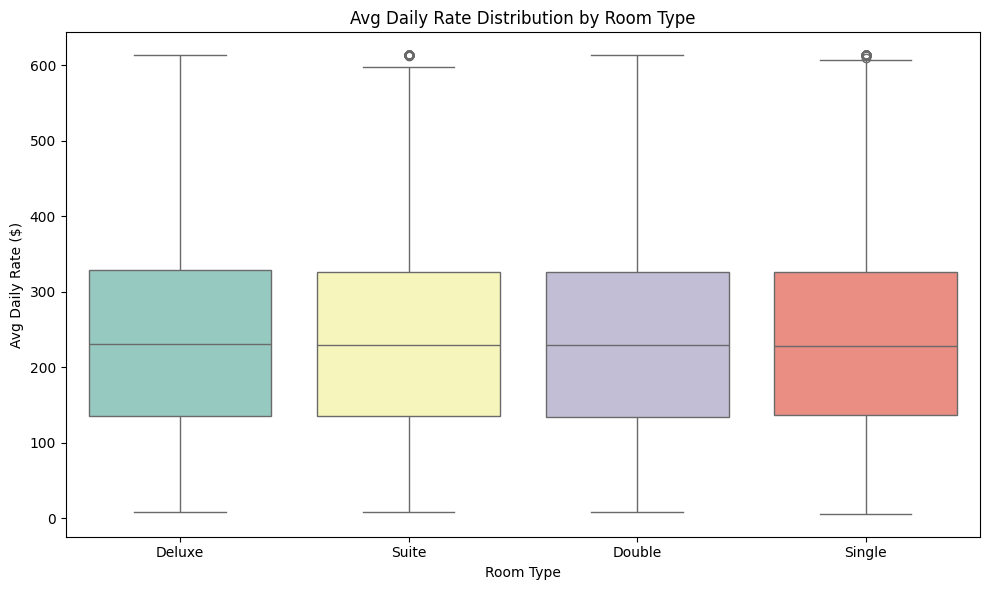

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset, x='room_type', y='avg_daily_rate', palette='Set3')
plt.title('Avg Daily Rate Distribution by Room Type')
plt.ylabel('Avg Daily Rate ($)')
plt.xlabel('Room Type')
plt.tight_layout()
plt.savefig("Avg Daily Rate of Room Type", dpi=300, bbox_inches='tight')
plt.show()


In [89]:
# Step 4: Check result
dataset['avg_daily_rate'].describe()

count    65858.000000
mean       235.990276
std        119.779169
min          5.946880
25%        135.800000
50%        229.600000
75%        326.795409
max        613.288523
Name: avg_daily_rate, dtype: float64

<!-- ## UPDATING DATE FORMAT ## -->

In [90]:
# check if 'checkin_date' is in index
print(dataset.index)

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 03:00:00', '2023-01-01 04:00:00',
               '2023-01-01 05:00:00', '2023-01-01 06:00:00',
               '2023-01-01 07:00:00', '2023-01-01 08:00:00',
               '2023-01-01 09:00:00', '2023-01-01 10:00:00',
               ...
               '2030-12-26 06:00:00', '2030-12-26 07:00:00',
               '2030-12-26 08:00:00', '2030-12-26 09:00:00',
               '2030-12-26 10:00:00', '2030-12-26 11:00:00',
               '2030-12-26 12:00:00', '2030-12-26 13:00:00',
               '2030-12-26 14:00:00', '2030-12-26 15:00:00'],
              dtype='datetime64[ns]', name='checkin_date', length=65858, freq=None)


In [91]:
# Reset index to make 'checkin_date' a regular column
dataset = dataset.reset_index()

# Now try to drop the column again
dataset = dataset.drop(columns = ['checkin_date'])

In [92]:
# check if 'checkin_date' exists in the columns
if 'checkin_date' in dataset.columns:
    dataset = dataset.drop(columns=['checkin_date'])
else:
    print("'checkin_date' column not found!")

'checkin_date' column not found!


In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65858 entries, 0 to 65857
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   booking_id         65858 non-null  int64  
 1   hotel_id           65858 non-null  int64  
 2   room_type          65858 non-null  object 
 3   customer_segment   65858 non-null  object 
 4   nights_stayed      65858 non-null  int64  
 5   booking_lead_time  65858 non-null  int64  
 6   occupancy_rate     65858 non-null  float64
 7   room_price         65858 non-null  float64
 8   discount_applied   65858 non-null  float64
 9   season             65858 non-null  object 
 10  day_of_week        65858 non-null  object 
 11  event_type         65858 non-null  object 
 12  competitor_price   65858 non-null  float64
 13  demand_index       65858 non-null  float64
 14  cancellation_flag  65858 non-null  int64  
 15  payment_method     65858 non-null  object 
 16  customer_rating    658

In [94]:
dataset.head()

,booking_id,hotel_id,room_type,customer_segment,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,season,day_of_week,event_type,competitor_price,demand_index,cancellation_flag,payment_method,customer_rating,extra_services,weekday_booking,weekend_booking,holiday_season,final_price,marketing_spend,customer_feedback,special_event,booking_month,avg_daily_rate,total_revenue,checkout_year,checkout_month,checkout_day
0,1,83,Deluxe,Business,2,77,0.974571,240.000000,0.210000,High,Sunday,Sport Event,278.00000,0.88,1,Online Payment,1.600000,All Inclusive,0,1,1,189.600000,598,Negative,0,January,177.377281,354.754562,2023,1,2
1,2,37,Suite,Leisure,8,141,0.940000,371.722847,0.011389,Peak,Tuesday,Sport Event,85.23576,0.91,0,Cash,2.100000,Spa,1,0,1,323.730000,397,Positive,0,January,277.443663,2219.549300,2023,1,2
2,4,92,Deluxe,Group,12,230,0.893630,47.713353,0.230000,High,Sunday,Sport Event,446.00000,1.34,0,Debit Card,3.700000,All Inclusive,0,1,1,41.580000,690,Positive,0,January,38.426648,461.119780,2023,1,2
3,5,72,Double,Group,7,362,0.800000,348.000000,0.010000,Low,Sunday,Holiday,299.22904,1.05,0,Cash,3.900000,Spa,0,1,0,344.520000,315,Positive,0,January,314.074813,2198.523692,2023,1,2
4,6,24,Single,Group,6,124,0.640000,374.782901,0.230000,Low,Tuesday,Holiday,128.00000,0.82,0,Online Payment,1.330687,All Inclusive,1,0,0,266.442993,854,Neutral,0,January,257.950000,1547.700000,2023,1,2


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## ENCODING OF DATA... ##

In [95]:
dataset.head(3)

,booking_id,hotel_id,room_type,customer_segment,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,season,day_of_week,event_type,competitor_price,demand_index,cancellation_flag,payment_method,customer_rating,extra_services,weekday_booking,weekend_booking,holiday_season,final_price,marketing_spend,customer_feedback,special_event,booking_month,avg_daily_rate,total_revenue,checkout_year,checkout_month,checkout_day
0,1,83,Deluxe,Business,2,77,0.974571,240.000000,0.210000,High,Sunday,Sport Event,278.00000,0.88,1,Online Payment,1.6,All Inclusive,0,1,1,189.60,598,Negative,0,January,177.377281,354.754562,2023,1,2
1,2,37,Suite,Leisure,8,141,0.940000,371.722847,0.011389,Peak,Tuesday,Sport Event,85.23576,0.91,0,Cash,2.1,Spa,1,0,1,323.73,397,Positive,0,January,277.443663,2219.549300,2023,1,2
2,4,92,Deluxe,Group,12,230,0.893630,47.713353,0.230000,High,Sunday,Sport Event,446.00000,1.34,0,Debit Card,3.7,All Inclusive,0,1,1,41.58,690,Positive,0,January,38.426648,461.119780,2023,1,2


In [96]:
print(dataset.columns)

Index(['booking_id', 'hotel_id', 'room_type', 'customer_segment',
       'nights_stayed', 'booking_lead_time', 'occupancy_rate', 'room_price',
       'discount_applied', 'season', 'day_of_week', 'event_type',
       'competitor_price', 'demand_index', 'cancellation_flag',
       'payment_method', 'customer_rating', 'extra_services',
       'weekday_booking', 'weekend_booking', 'holiday_season', 'final_price',
       'marketing_spend', 'customer_feedback', 'special_event',
       'booking_month', 'avg_daily_rate', 'total_revenue', 'checkout_year',
       'checkout_month', 'checkout_day'],
      dtype='object')


In [97]:
dataset.shape

(65858, 31)

**--> Importing Scikit-learn liabraries...**

In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

**--> Encoding to 'room_type'**

In [99]:
# (0 = 'Deluxe', 1 = 'Double', 2 = 'Single', 3 = 'Suite')
dataset['room_type'].unique()

array(['Deluxe', 'Suite', 'Double', 'Single'], dtype=object)

In [100]:
le = LabelEncoder()
dataset['room_type'] = le.fit_transform(dataset[['room_type']])

**--> Encoding to 'Customer_Segment'**

In [101]:
# (0 = 'Business', 1 = 'Group', 2 = 'Leisure', 3 = 'Solo')
dataset['customer_segment'].unique()

array(['Business', 'Leisure', 'Group', 'Solo'], dtype=object)

In [102]:
le = LabelEncoder()
dataset['customer_segment'] = le.fit_transform(dataset[['customer_segment']])

**--> Encoding to 'payment_method'**

In [103]:
# (0 = 'Cash', 1 = 'Credit Card', 2 = 'Debit Card', 3 = 'Online paymnet')
dataset['payment_method'].unique()

array(['Online Payment', 'Cash', 'Debit Card', 'Credit Card'],
      dtype=object)

In [104]:
le = LabelEncoder()
dataset['payment_method'] = le.fit_transform(dataset[['payment_method']])

**--> Encoding to 'season'**

In [105]:
# (0 = 'High', 1 = 'Low', 2 = 'Mid', 3 = 'Peak')
dataset['season'].unique()

array(['High', 'Peak', 'Low', 'Mid'], dtype=object)

In [106]:
le = LabelEncoder()
dataset['season'] = le.fit_transform(dataset[['season']])

**--> Encoding to 'day_of_week'**

In [107]:
dataset['day_of_week'].unique()

array(['Sunday', 'Tuesday', 'Thursday', 'Wednesday', 'Saturday', 'Monday',
       'Friday'], dtype=object)

In [108]:
week_mapping = {'Sunday':1, 'Tuesday':3, 'Friday':6, 'Thursday':5, 'Wednesday':4, 'Saturday':7,
       'Monday':2}
dataset['day_of_week'] = dataset['day_of_week'].map(week_mapping)

**--> Enconding of 'event_type'**

In [109]:
# (0='conference', 1='Festivsl', 2='Holiday', 3='Sport event')
dataset['event_type'].unique()

array(['Sport Event', 'Holiday', 'Festival', 'Conference'], dtype=object)

In [110]:
le = LabelEncoder()
dataset['event_type'] = le.fit_transform(dataset[['event_type']])

**--> Enconding of 'Customer_feedback'**

In [111]:
# (0='Negative', 1='Neutral', 2='Positive')
dataset['customer_feedback'].unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [112]:
dataset['customer_feedback'] = le.fit_transform(dataset[['customer_feedback']])

**--> Encoding of 'extra_services'**

In [113]:
# (0='All Inclusive', 1='Breakfast', 2='Parking', 3='spa')

In [114]:
dataset['extra_services'].unique()

array(['All Inclusive', 'Spa', 'Parking', 'Breakfast'], dtype=object)

In [115]:
le = LabelEncoder()
dataset['extra_services'] = le.fit_transform(dataset[['extra_services']])

**--> Encoding of 'booking_month'**

In [116]:
dataset['booking_month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [117]:
month_mapping = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
       'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

In [118]:
dataset['booking_month'] = dataset['booking_month'].map(month_mapping)

In [119]:
dataset['booking_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [120]:
# checking .......
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65858 entries, 0 to 65857
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   booking_id         65858 non-null  int64  
 1   hotel_id           65858 non-null  int64  
 2   room_type          65858 non-null  int64  
 3   customer_segment   65858 non-null  int64  
 4   nights_stayed      65858 non-null  int64  
 5   booking_lead_time  65858 non-null  int64  
 6   occupancy_rate     65858 non-null  float64
 7   room_price         65858 non-null  float64
 8   discount_applied   65858 non-null  float64
 9   season             65858 non-null  int64  
 10  day_of_week        65858 non-null  int64  
 11  event_type         65858 non-null  int64  
 12  competitor_price   65858 non-null  float64
 13  demand_index       65858 non-null  float64
 14  cancellation_flag  65858 non-null  int64  
 15  payment_method     65858 non-null  int64  
 16  customer_rating    658

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Shift 'Total_Revenue' column to the last Index of Column ##

In [121]:
dataset = dataset[[col for col in dataset.columns if col != 'total_revenue'] + ['total_revenue']]

In [122]:
dataset.to_csv("cleaned_hoteldata_after_encoding.csv", index=False)


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


## Show correaltion data by using heatmap.. ##

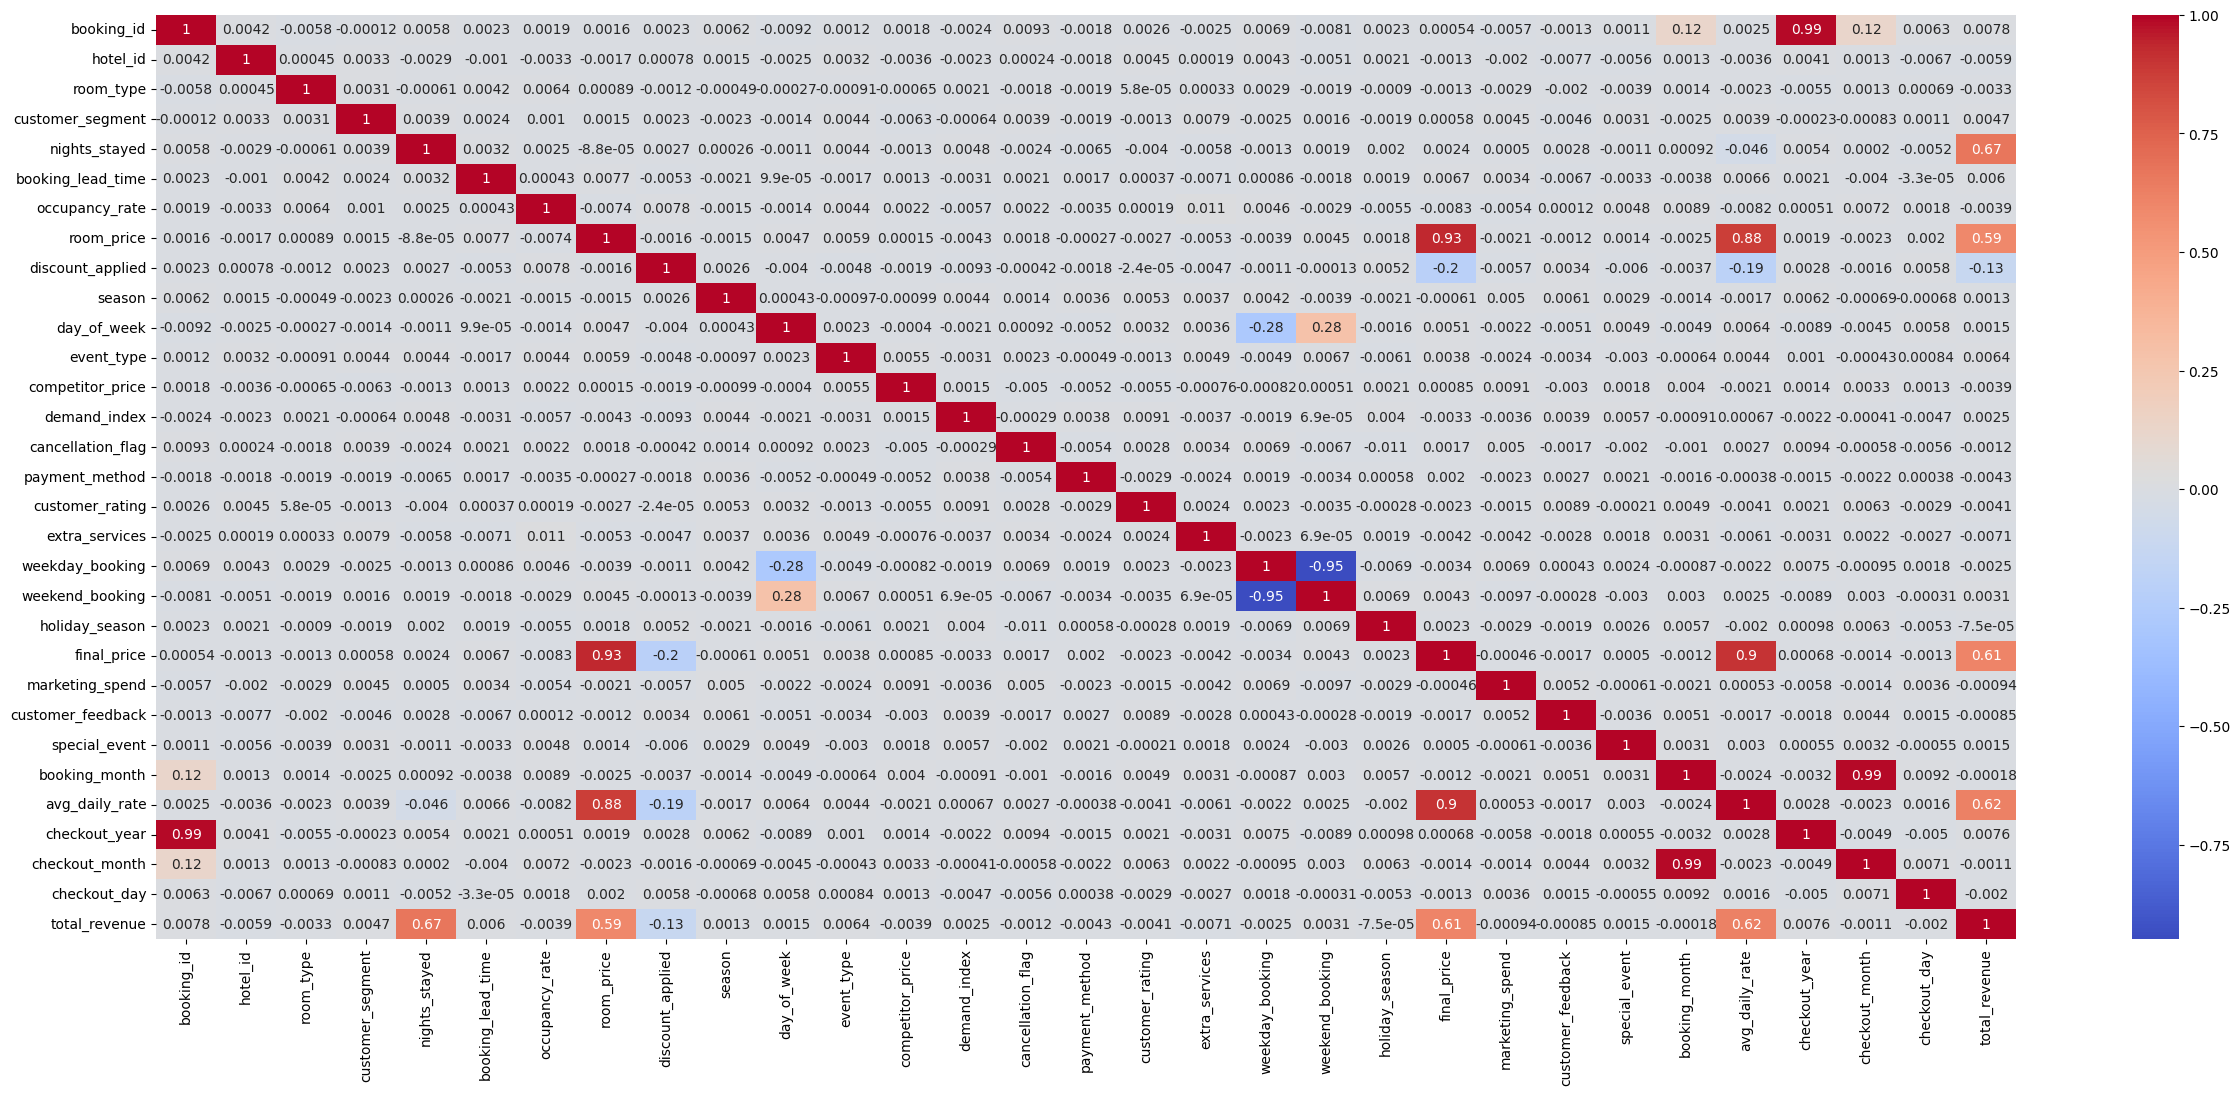

In [123]:
plt.figure(figsize=(30, 12))
sns.heatmap(data = dataset.corr(), annot = True,cmap = 'coolwarm')
plt.savefig("correalation heatmap chart", dpi=300, bbox_inches='tight')
plt.show()

## Features Scaling Techinique.. ##

**Standarlization (Z-Score Scaling):**

*Centers the data around 0 with a standard deviation of 1.*

*This is useful when the data has Gaussian distribution and when you need to compare features with different units.*

In [124]:
dataset.head()

,booking_id,hotel_id,room_type,customer_segment,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,season,day_of_week,event_type,competitor_price,demand_index,cancellation_flag,payment_method,customer_rating,extra_services,weekday_booking,weekend_booking,holiday_season,final_price,marketing_spend,customer_feedback,special_event,booking_month,avg_daily_rate,checkout_year,checkout_month,checkout_day,total_revenue
0,1,83,0,0,2,77,0.974571,240.000000,0.210000,0,1,3,278.00000,0.88,1,3,1.600000,0,0,1,1,189.600000,598,0,0,1,177.377281,2023,1,2,354.754562
1,2,37,3,2,8,141,0.940000,371.722847,0.011389,3,3,3,85.23576,0.91,0,0,2.100000,3,1,0,1,323.730000,397,2,0,1,277.443663,2023,1,2,2219.549300
2,4,92,0,1,12,230,0.893630,47.713353,0.230000,0,1,3,446.00000,1.34,0,2,3.700000,0,0,1,1,41.580000,690,2,0,1,38.426648,2023,1,2,461.119780
3,5,72,1,1,7,362,0.800000,348.000000,0.010000,1,1,2,299.22904,1.05,0,0,3.900000,3,0,1,0,344.520000,315,2,0,1,314.074813,2023,1,2,2198.523692
4,6,24,2,1,6,124,0.640000,374.782901,0.230000,1,3,2,128.00000,0.82,0,3,1.330687,0,1,0,0,266.442993,854,1,0,1,257.950000,2023,1,2,1547.700000


In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [126]:
x = dataset[['room_type', 'customer_segment', 'nights_stayed',
            'booking_lead_time', 'occupancy_rate', 'room_price', 'discount_applied',
            'season', 'day_of_week', 'event_type', 'competitor_price', 'demand_index',
            'cancellation_flag', 'payment_method', 'customer_rating', 'extra_services', 
            'holiday_season', 'final_price', 'marketing_spend', 'customer_feedback', 
            'special_event', 'booking_month', 'avg_daily_rate']]

y = dataset['total_revenue']

In [127]:
# dataset.head()

In [128]:
# print(dataset.dtypes)  # Check data types of all columns


In [129]:
sc =StandardScaler()
sc.fit(x)

StandardScaler()

In [130]:
x = pd.DataFrame(sc.transform(x),columns = x.columns)

In [131]:
x.columns

Index(['room_type', 'customer_segment', 'nights_stayed', 'booking_lead_time',
       'occupancy_rate', 'room_price', 'discount_applied', 'season',
       'day_of_week', 'event_type', 'competitor_price', 'demand_index',
       'cancellation_flag', 'payment_method', 'customer_rating',
       'extra_services', 'holiday_season', 'final_price', 'marketing_spend',
       'customer_feedback', 'special_event', 'booking_month',
       'avg_daily_rate'],
      dtype='object')

In [132]:
dataset.head()

,booking_id,hotel_id,room_type,customer_segment,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,season,day_of_week,event_type,competitor_price,demand_index,cancellation_flag,payment_method,customer_rating,extra_services,weekday_booking,weekend_booking,holiday_season,final_price,marketing_spend,customer_feedback,special_event,booking_month,avg_daily_rate,checkout_year,checkout_month,checkout_day,total_revenue
0,1,83,0,0,2,77,0.974571,240.000000,0.210000,0,1,3,278.00000,0.88,1,3,1.600000,0,0,1,1,189.600000,598,0,0,1,177.377281,2023,1,2,354.754562
1,2,37,3,2,8,141,0.940000,371.722847,0.011389,3,3,3,85.23576,0.91,0,0,2.100000,3,1,0,1,323.730000,397,2,0,1,277.443663,2023,1,2,2219.549300
2,4,92,0,1,12,230,0.893630,47.713353,0.230000,0,1,3,446.00000,1.34,0,2,3.700000,0,0,1,1,41.580000,690,2,0,1,38.426648,2023,1,2,461.119780
3,5,72,1,1,7,362,0.800000,348.000000,0.010000,1,1,2,299.22904,1.05,0,0,3.900000,3,0,1,0,344.520000,315,2,0,1,314.074813,2023,1,2,2198.523692
4,6,24,2,1,6,124,0.640000,374.782901,0.230000,1,3,2,128.00000,0.82,0,3,1.330687,0,1,0,0,266.442993,854,1,0,1,257.950000,2023,1,2,1547.700000


## TRAIN TEST AND SPLIT ##

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [135]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [136]:
# now making object, fitting model and checking accuracy...

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


## LinearRigrressor ##

In [137]:
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [138]:
print("Train Score : ",lr.score(x_train, y_train)*100) 
print("Test Score : ",lr.score(x_test, y_test)*100)

Train Score :  87.64874730667026
Test Score :  87.94796335535331


In [139]:
print("MSE : ",mean_squared_error(y_test, lr.predict(x_test)))
print("MAE : ",mean_absolute_error(y_test, lr.predict(x_test)))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))


MSE :  219234.21084763654
MAE :  346.2987481479146
RMSE :  468.22453037793366


In [140]:
# Show with Diagram

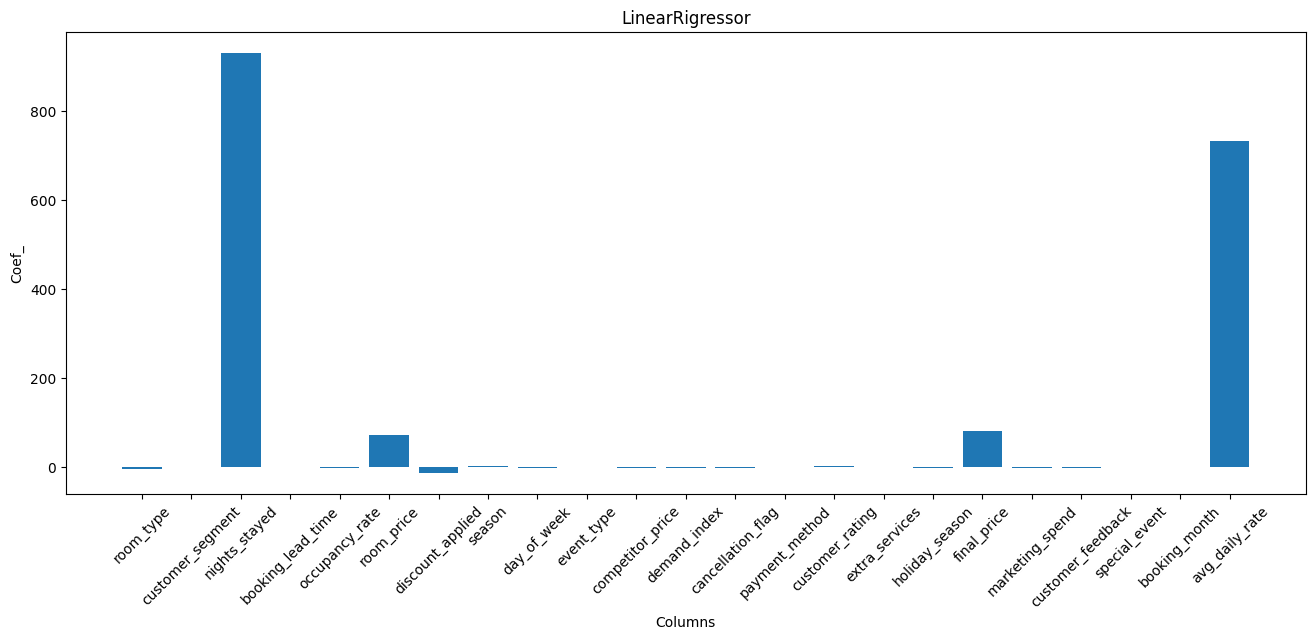

In [141]:
plt.figure(figsize=(16, 6))
plt.bar(x.columns, lr.coef_)
plt.title('LinearRigressor')
plt.xlabel('Columns')
plt.ylabel('Coef_')
plt.xticks(rotation = 45)
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


## DecisionTreeRegressor ##

In [142]:
from sklearn.tree import DecisionTreeRegressor

In [143]:
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=4)

In [144]:
print("Train Score : ",dt.score(x_train, y_train)*100) 
print("Test Score : ",dt.score(x_test, y_test)*100)

Train Score :  92.03523925238325
Test Score :  92.30572686093106


In [145]:
print("MSE : ",mean_squared_error(y_test, dt.predict(x_test)))
print("MAE : ",mean_absolute_error(y_test, dt.predict(x_test)))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, dt.predict(x_test))))


MSE :  139963.72143783807
MAE :  275.52067400707557
RMSE :  374.1172562684567


**Plot feature importances for Decision Tree Regressor**

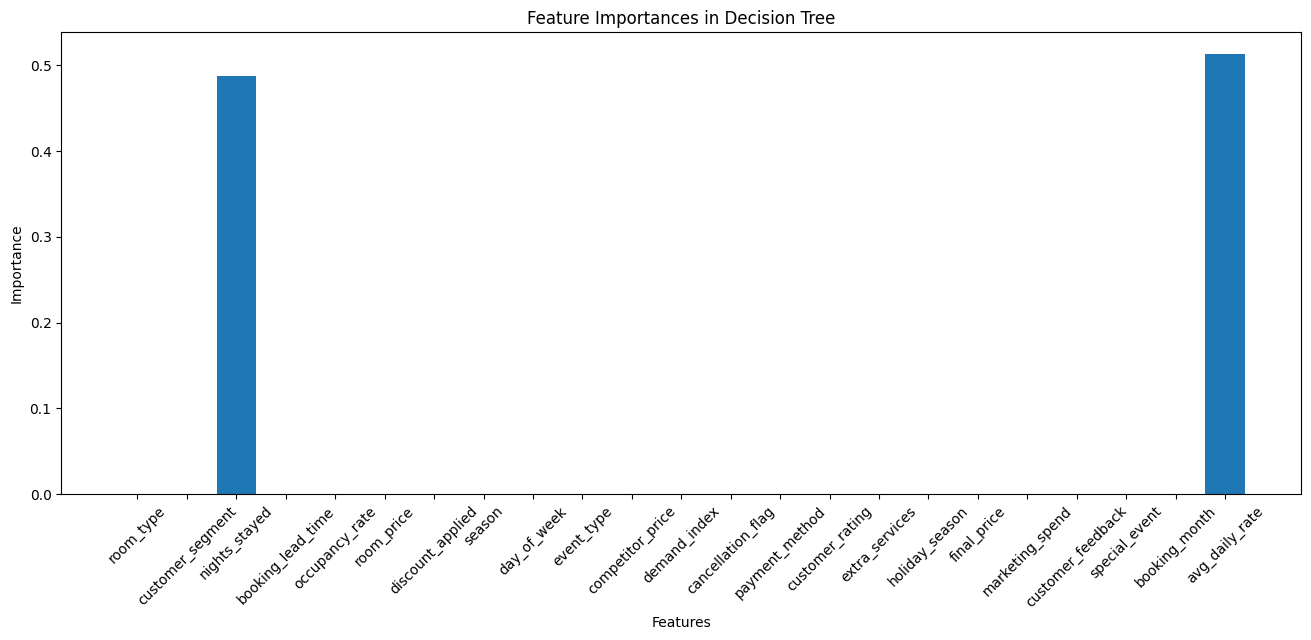

In [146]:
plt.figure(figsize =(16, 6))
plt.bar(x.columns, dt.feature_importances_) # Use 'feature_imporatnces_'
plt.title('Feature Importances in Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation = 45)
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


## GradientBoosting Regressor ##

In [147]:
from sklearn.ensemble import GradientBoostingRegressor

In [148]:
gr =GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
)
gr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=10, max_features='sqrt',
                          min_samples_leaf=2, min_samples_split=4,
                          random_state=42, subsample=0.8)

In [149]:
print("Train Score : ",gr.score(x_train, y_train)*100) 
print("Test Score : ",gr.score(x_test, y_test)*100)

Train Score :  99.55755500055135
Test Score :  99.02275344674304


In [150]:
print("MSE : ",mean_squared_error(y_test, gr.predict(x_test)))
print("MAE : ",mean_absolute_error(y_test, gr.predict(x_test)))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, gr.predict(x_test))))


MSE :  17776.736266565098
MAE :  88.61613501991121
RMSE :  133.32942760908074


In [151]:
import joblib

# Save the model
joblib.dump(gr, 'gr_hotel_model.pkl')

['gr_hotel_model.pkl']

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


# Random Forest Regressor #

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
rf = RandomForestRegressor(oob_score=True, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=10, bootstrap=True)
rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', oob_score=True)

In [154]:
print("Train Score : ",rf.score(x_train, y_train)*100) 
print("Test Score : ",rf.score(x_test, y_test)*100)

Train Score :  93.26793428899323
Test Score :  92.55768773965674


## Evaluate Using MSE, MAE, RMSE ##

In [155]:
print("MSE : ",mean_squared_error(y_test, rf.predict(x_test)))
print("MAE : ",mean_absolute_error(y_test, rf.predict(x_test)))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, rf.predict(x_test))))


MSE :  135380.3928237121
MAE :  255.7824489333204
RMSE :  367.9407463488002


## Show *Feature Imporatance, *Acutal Revenue And *Residual (Prediction Errors)

**********************************************************************************************************************************************************************************************************************************************************
**********************************************************************************************************************************************************************************************************************************************************


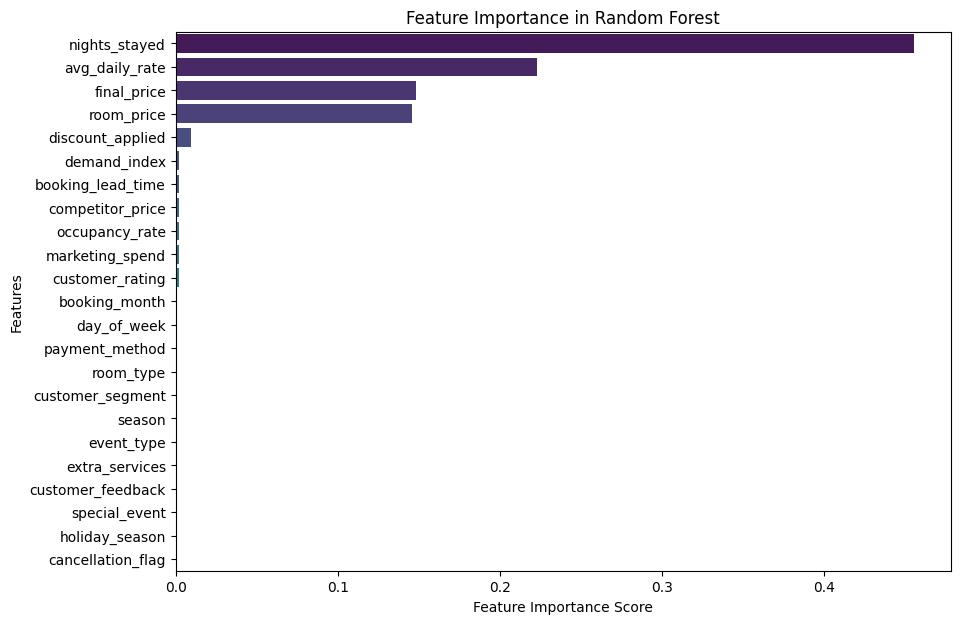

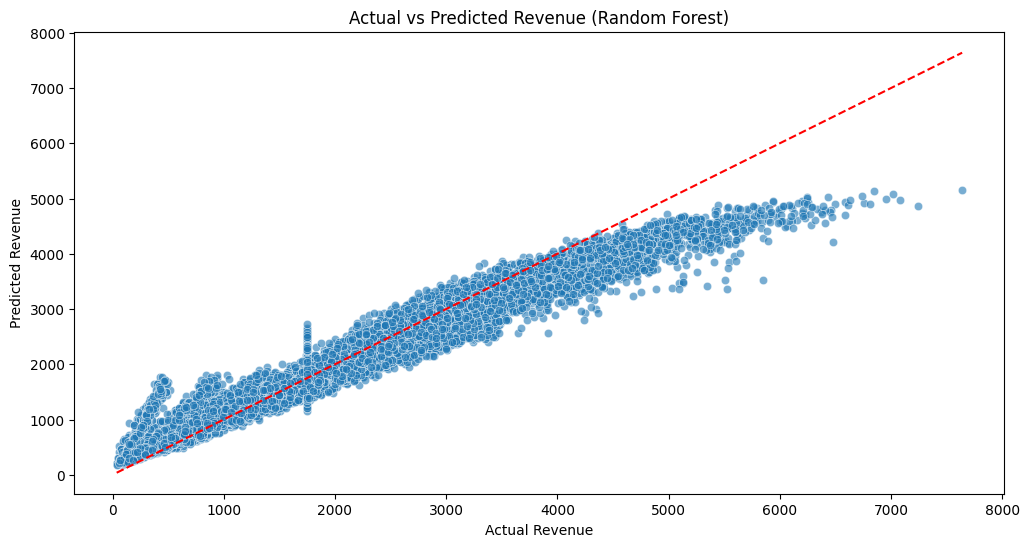

**********************************************************************************************************************************************************************************************************************************************************


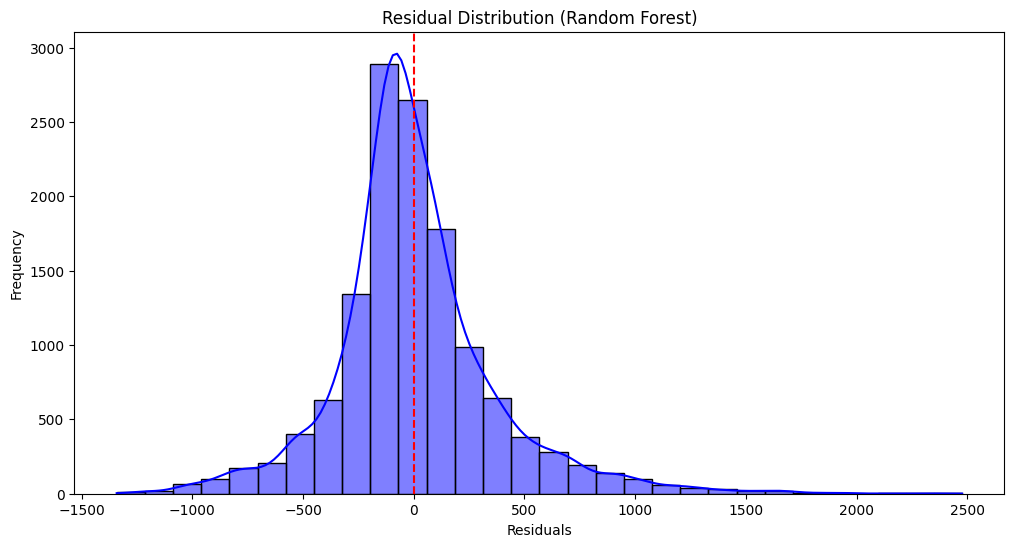

**********************************************************************************************************************************************************************************************************************************************************


In [156]:
print('*'*250)
# Predictions
y_pred = rf.predict(x_test)

# Calculate residuals
residuals = y_test - y_pred

# ------------------------------ PLOT 1: FEATURE IMPORTANCE ------------------------------
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances[sorted_indices], y=x.columns[sorted_indices], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
print('*'*250)


# ------------------------------ PLOT 2: ACTUAL VS PREDICTED REVENUE ------------------------------
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue (Random Forest)")
plt.show()
print('*'*250)



# ------------------------------ PLOT 3: RESIDUAL DISTRIBUTION ------------------------------
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Random Forest)")
plt.show()
print('*'*250)




In [157]:
import joblib

# Save the model
joblib.dump(rf, 'rf_hotel_model.pkl')

['rf_hotel_model.pkl']

# XGBoost Regressor (SELECTED) #

In [158]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb_model = XGBRegressor( n_estimators=300, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1 ) # uses all cores

xgb_model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [159]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = xgb_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 2990.0370954916016
R² Score: 0.9983562767642701


In [160]:
print("Train Score : ",xgb_model.score(x_train, y_train)*100) 
print("Test Score : ",xgb_model.score(x_test, y_test)*100)

Train Score :  99.92061418448111
Test Score :  99.83562767642701


In [161]:
print("MSE : ",mean_squared_error(y_test, xgb_model.predict(x_test)))
print("MAE : ",mean_absolute_error(y_test, xgb_model.predict(x_test)))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, xgb_model.predict(x_test))))


MSE :  2990.0370954916016
MAE :  31.04709387361863
RMSE :  54.6812316566809


# 🔁 Cross-validation: #

In [162]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, x, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Mean CV Score:", scores.mean())


Cross-validation R² scores: [0.99838631 0.99803525 0.99796682 0.99786786 0.99829116]
Mean CV Score: 0.9981094805555084


# Residual Plot (Prediction vs Actual), Features Importance (by gain) AND Distribution of Residuals #

**********************************************************************************************************************************************************************************************************************************************************


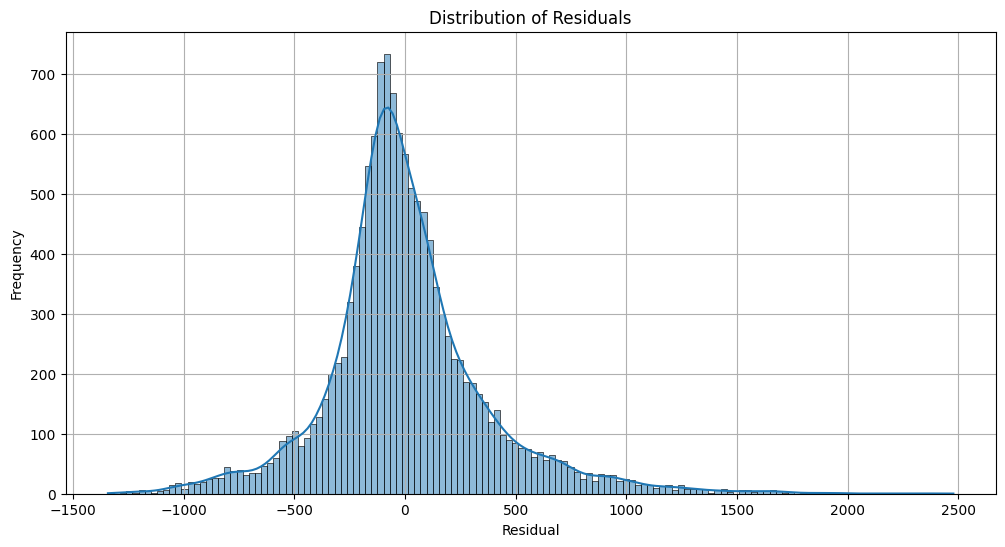

**********************************************************************************************************************************************************************************************************************************************************


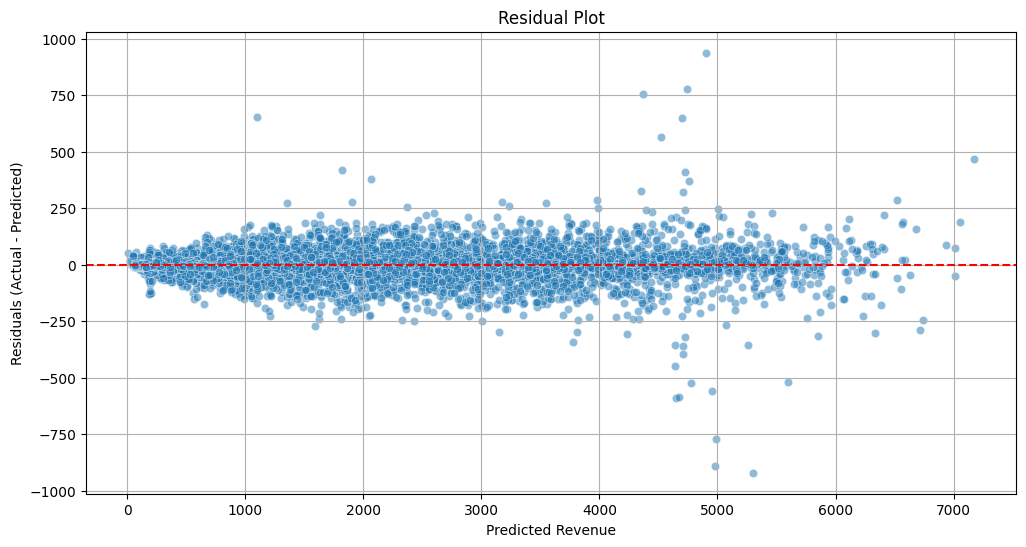

**********************************************************************************************************************************************************************************************************************************************************


<Figure size 1200x600 with 0 Axes>

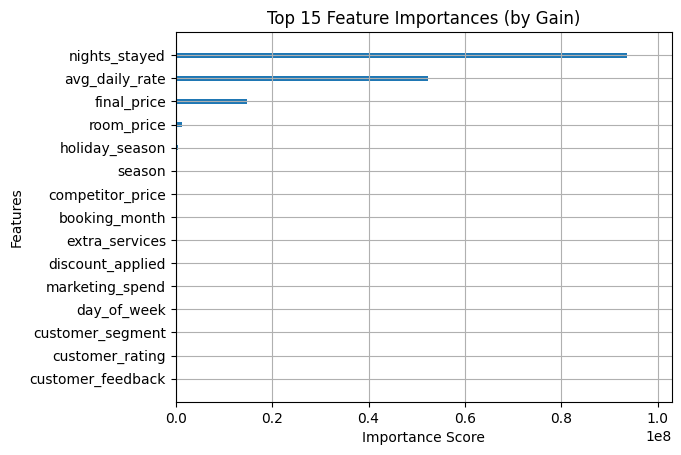

**********************************************************************************************************************************************************************************************************************************************************


In [163]:
print('*'*250)
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print('*'*250)
# Predict on test data
y_pred = xgb_model.predict(x_test)

# Residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()
print('*'*250)

# Plot built-in feature importance
plt.figure(figsize=(12, 6))
xgb.plot_importance(xgb_model, importance_type='gain', show_values=False, max_num_features=15)
plt.title("Top 15 Feature Importances (by Gain)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()
print('*'*250)

### SAVED XGBOOST REGRESSOR ###

In [164]:
joblib.dump(xgb_model, 'xgb_hotel_model.pkl')

['xgb_hotel_model.pkl']

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


## KNeighbor Regressor

In [165]:
from sklearn.neighbors import KNeighborsRegressor

In [166]:
knn = KNeighborsRegressor(n_neighbors=15, algorithm='auto')
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [167]:
knn.score(x_train, y_train)*100, knn.score(x_test, y_test)*100


  File "C:\Users\sawma\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\sawma\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sawma\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                

(85.7713561002246, 83.87204951484554)

In [168]:
print("MSE : ",mean_squared_error(y_test, knn.predict(x_test)))
print("MAE : ",mean_absolute_error(y_test, knn.predict(x_test)))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, knn.predict(x_test))))


MSE :  293377.6756124563
MAE :  407.6530852965334
RMSE :  541.6434949415125


In [169]:
import joblib

# Save the model
joblib.dump(knn, 'knn_hotel_model.pkl')

['knn_hotel_model.pkl']

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


In [170]:
x_test

,room_type,customer_segment,nights_stayed,booking_lead_time,occupancy_rate,room_price,discount_applied,season,day_of_week,event_type,competitor_price,demand_index,cancellation_flag,payment_method,customer_rating,extra_services,holiday_season,final_price,marketing_spend,customer_feedback,special_event,booking_month,avg_daily_rate
46406,0.449522,-0.445375,-0.372917,-0.183033,-1.670808,-0.386667,0.123939,-1.335948,1.502478,0.172824,-0.567496,-0.549186,-0.412963,0.445011,0.005209,-1.549615,1.032192,-0.396830,-0.115774,-1.226938,-0.498728,0.430435,-0.392311
59550,-0.445201,-1.340446,-1.123117,1.138629,-0.749201,-1.482278,0.396212,0.453813,-1.001069,0.172824,-1.280965,1.048345,-0.412963,-0.448756,-1.212710,-0.691047,-0.968812,-1.449958,1.194590,-0.001321,-0.498728,-1.020846,-1.389494
43120,1.344244,-1.340446,-0.122850,1.081166,0.443813,-0.464347,0.123939,-1.335948,0.501059,1.029890,-0.467785,-1.766411,2.421525,-0.448756,-1.386698,1.026089,1.032192,-0.238991,-1.556791,-0.001321,-0.498728,-1.020846,-0.605440
43090,-0.445201,-0.445375,1.627617,0.219212,0.188569,-1.109092,1.405056,-0.441067,1.502478,1.029890,-0.861277,-1.126948,-0.412963,0.445011,0.527174,0.167521,-0.968812,-1.219928,-0.277168,1.224295,-0.498728,-1.020846,-1.165740
58259,-1.339924,1.344767,-0.372917,-0.259651,1.612416,1.532071,-1.273643,0.453813,1.502478,1.029890,0.914667,-0.825523,-0.412963,-0.448756,1.136134,0.167521,-0.968812,1.455138,-0.696023,-1.226938,-0.498728,-1.601359,1.328015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63170,-0.445201,-0.445375,1.627617,0.487375,1.209213,0.172630,-1.157178,-0.441067,-0.500360,0.172824,0.684572,0.562527,-0.412963,-1.342523,0.721893,1.026089,-0.968812,0.200086,1.179219,-0.001321,-0.498728,0.430435,0.322916
57261,-0.445201,-0.445375,-1.623251,-1.293996,0.433660,0.561031,1.868166,-1.335948,-1.501779,-1.541308,-1.539772,0.805436,2.421525,-0.448756,-0.000340,-1.549615,1.032192,0.174558,0.107103,1.224295,-0.498728,1.591460,0.144598
50727,1.344244,-0.445375,1.377550,-1.418500,-0.922003,1.734001,-1.634763,0.453813,-1.001069,0.172824,0.866437,-1.487422,-0.412963,-0.448756,1.484111,1.026089,-0.968812,2.681022,-0.354022,1.224295,-0.498728,-1.311103,2.526696
33296,0.449522,0.449696,0.377283,-0.115992,-0.230797,0.413439,0.110698,1.348693,0.501059,-0.684242,-0.084855,0.120459,-0.412963,-1.342523,-0.540745,-0.691047,1.032192,0.313606,-0.734451,-0.001321,-0.498728,-1.601359,0.134478


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


## TESTING ##

In [171]:
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = gr.predict(x_test)
y_pred4 = xgb_model.predict(x_test)
y_pred5 = dt.predict(x_test)
y_pred6 = knn.predict(x_test)


In [172]:
dataset1 = pd.DataFrame({'Actual':y_test, 'LinearRigrressor':y_pred1, ' Random Forest Regressor':y_pred2, 'GradientBoosting':y_pred3, 'XGBoostRegressor':y_pred4, 'DecisionTreeRegressor':y_pred5, 'KNeighbor':y_pred6})
dataset1

,Actual,LinearRigrressor,Random Forest Regressor,GradientBoosting,XGBoostRegressor,DecisionTreeRegressor,KNeighbor
46406,1134.000000,1050.175955,1030.254432,1142.761039,1139.929810,1127.111909,1136.139494
59550,208.677430,-540.823458,272.653585,201.904017,203.208755,183.422774,359.567809
43120,1083.600000,1123.879578,1120.712596,1161.726492,1176.096313,1127.111909,1435.453746
43090,1349.040000,2213.652129,1148.907622,1285.951434,1337.575195,1266.274422,1438.040130
58259,2370.345571,2629.165663,2372.515350,2299.955192,2347.229248,2809.363919,2142.282454
...,...,...,...,...,...,...,...
63170,3845.359801,3544.829842,3126.167844,3700.220283,3831.686035,3675.355296,3367.471663
57261,253.310000,368.175934,865.268639,300.323007,239.840805,585.201457,852.392002
50727,7022.483558,5250.085048,5074.482691,6304.100174,6934.703125,4955.748634,4799.404487
33296,2151.680000,2251.730321,2450.609749,2287.749033,2250.900635,2615.633315,2252.648185


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


## Create SQLite Database from Cleaned Data (Before Encoding) ##

In [173]:
import pandas as pd
import sqlite3

# Step 1: Load your cleaned data (before encoding)
df = pd.read_csv("cleaned_hoteldata_before_encoding.csv")

# Step 2: Connect to SQLite database (creates file if not exist)
conn = sqlite3.connect("hotel_revenue.db")  # This creates a DB file

# Step 3: Save DataFrame to SQL table
df.to_sql("hotel_data", conn, if_exists="replace", index=False)

# Optional: Check saved tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

conn.close()


         name
0  hotel_data


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


# *For full interactive version of the notebook, please refer to this GitHub link: https://github.com/balramshah01/hotel_webapp* 



**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


# *Note:* #

## *After completing data cleaning, exploratory data analysis (EDA), visualizations, and building machine learning models (including Random Forest, XGBoost Regressor and Gradient Boosting,etc..), I have now moved forward to the next phase of the project.* ##

## *I’ve started creating an interactive dashboard using Streamlit in Visual Studio Code (VS Code). This dashboard will display insights, predictions and revenue analysis in a user-friendly interface for hotel managers.* ##

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


# WebApp_Link : https://balramshah-hotel-webapp.streamlit.app